# FAVORITA final project EDA

In [1]:
library(readr)
library(mechkar)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# general visualisation
library('ggplot2') # visualisation
library('scales') # visualisation
library('grid') # visualisation
library('gridExtra') # visualisation
library('RColorBrewer') # visualisation
library('corrplot') # visualisation

# general data manipulation
library('dplyr') # data manipulation
library('readr') # input/output
library('data.table') # data manipulation
library('tibble') # data wrangling
library('tidyr') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation

# specific visualisation
library('ggrepel') # visualisation
library('treemapify') # visualisation
library('ggforce') # visualisation
library('ggridges') # visualization

# specific data manipulation
library('broom') # data wrangling
library('purrr') # string manipulation

# Date plus forecast
library('lubridate') # date and time
library(prophet)
library(xgboost)
library(caret)
library('timeDate') # date and time


Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


corrplot 0.84 loaded


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




ERROR: Error in library("treemapify"): there is no package called 'treemapify'


In [3]:
dfitems <- read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/kaggel original/items.csv")
dfstores <- read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/kaggel original/stores.csv")
dftransactions <- read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/kaggel original/transactions.csv")
dfholidays <- read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/kaggel original/holidays_events.csv")
dfoil <- read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/kaggel original/oil.csv")

In [4]:
dfseafood14ff<-read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/FF_SQL1.csv")

In [5]:
dfseafood14ff

YYYYWW,WW,store_nbr,item_nbr,item_class,preishable_item,weekly_sales,weekly_returns,weekly_transactions,onpromotion,...,National_Ecuador_weekly_holidays,National_Ecuador_weekly_additionals,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,oil_weekly_avg,oil_weekly_max,oil_weekly_min
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
201528,28,46,1247036,2864,1,4,NA,26816,True,...,0,0,0,0,0,0,0,52.38,52.76,51.61
201630,30,46,695758,2802,1,59,NA,21548,False,...,0,0,0,0,0,0,0,44.44,45.23,43.41
201703,3,47,1247036,2864,1,22,NA,27041,False,...,0,0,0,0,0,0,0,51.82,52.45,51.12
201526,26,46,741201,2854,1,43,NA,24231,True,...,0,0,0,0,0,0,0,60.01,61.05,59.41
201705,5,47,1110679,2850,1,38,NA,27498,False,...,0,0,0,0,0,0,0,53.33,53.90,52.63
201603,3,47,695758,2802,1,49,NA,26574,False,...,0,0,0,0,0,0,0,30.59,31.42,29.45
201452,52,46,1247036,2864,1,12,NA,39346,True,...,1,5,0,1,0,0,0,55.58,56.78,54.59
201527,27,48,1110679,2850,1,26,NA,22581,False,...,0,0,0,0,0,0,0,57.92,59.48,56.93
201716,16,46,699745,2802,1,62,NA,24059,False,...,0,0,0,0,0,0,0,51.09,52.62,49.64


In [7]:
sum(is.na(dfseafood14ff))

[1] 12649

In [8]:
getMissingness(dfseafood14ff)

list(var = c("weekly_returns", "oil_weekly_avg", "oil_weekly_max", "oil_weekly_min"), na_count = c(9946, 901, 901, 901), rate = c(99.9, 9.1, 9.1, 9.1))This dataset has 5 (0.1%) complete rows. Original data has 9951 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>
weekly_returns,9946,99.9
oil_weekly_avg,901,9.1
oil_weekly_max,901,9.1
oil_weekly_min,901,9.1


### Fill NA where missing values from SQL FF

In [9]:
for (col in names(dfseafood14ff)) {
  set(dfseafood14ff, which(dfseafood14ff[[col]]==""), col, NA)
}

In [10]:
for (col in names(dfseafood14ff)) {
  set(dfseafood14ff, which(dfseafood14ff[[col]]=="NULL"), col, NA)
}


In [11]:
sum(is.na(dfseafood14ff))

[1] 14223

In [12]:
getMissingness(dfseafood14ff)

list(var = c("weekly_returns", "onpromotion", "oil_weekly_avg", "oil_weekly_max", "oil_weekly_min"), na_count = c(9946, 1574, 901, 901, 901), rate = c(99.9, 15.8, 9.1, 9.1, 9.1))This dataset has 5 (0.1%) complete rows. Original data has 9951 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>
weekly_returns,9946,99.9
onpromotion,1574,15.8
oil_weekly_avg,901,9.1
oil_weekly_max,901,9.1
oil_weekly_min,901,9.1


In [13]:
names(dfseafood14ff)

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "preishable_item"                    
 [7] "weekly_sales"                        "weekly_returns"                     
 [9] "weekly_transactions"                 "onpromotion"                        
[11] "city"                                "state"                              
[13] "National_Ecuador_weekly_holidays"    "National_Ecuador_weekly_additionals"
[15] "National_Ecuador_weekly_events"      "National_Ecuador_weekly_bridges"    
[17] "locale_Ambato_weekly_holidays"       "locale_Quito_weekly_holidays"       
[19] "locale_Quito_weekly_additionals"     "oil_weekly_avg"                     
[21] "oil_weekly_max"                      "oil_weekly_min"

In [14]:
# Remove weekly_returns, as the returns transactions are neglectable
dfseafood14ff <- dfseafood14ff[,-c(8)]
head(dfseafood14ff)

,YYYYWW,WW,store_nbr,item_nbr,item_class,preishable_item,weekly_sales,weekly_transactions,onpromotion,city,...,National_Ecuador_weekly_holidays,National_Ecuador_weekly_additionals,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,oil_weekly_avg,oil_weekly_max,oil_weekly_min
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,201528,28,46,1247036,2864,1,4,26816,True,Quito,...,0,0,0,0,0,0,0,52.38,52.76,51.61
2,201630,30,46,695758,2802,1,59,21548,False,Quito,...,0,0,0,0,0,0,0,44.44,45.23,43.41
3,201703,3,47,1247036,2864,1,22,27041,False,Quito,...,0,0,0,0,0,0,0,51.82,52.45,51.12
4,201526,26,46,741201,2854,1,43,24231,True,Quito,...,0,0,0,0,0,0,0,60.01,61.05,59.41
5,201705,5,47,1110679,2850,1,38,27498,False,Quito,...,0,0,0,0,0,0,0,53.33,53.90,52.63
6,201603,3,47,695758,2802,1,49,26574,False,Quito,...,0,0,0,0,0,0,0,30.59,31.42,29.45


In [15]:
getMissingness(dfseafood14ff)

list(var = c("onpromotion", "oil_weekly_avg", "oil_weekly_max", "oil_weekly_min"), na_count = c(1574, 901, 901, 901), rate = c(15.8, 9.1, 9.1, 9.1))This dataset has 7888 (79.3%) complete rows. Original data has 9951 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>
onpromotion,1574,15.8
oil_weekly_avg,901,9.1
oil_weekly_max,901,9.1
oil_weekly_min,901,9.1


In [16]:
dim(dfseafood14ff)

[1] 9951   21

In [17]:
names(dfseafood14ff)

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "preishable_item"                    
 [7] "weekly_sales"                        "weekly_transactions"                
 [9] "onpromotion"                         "city"                               
[11] "state"                               "National_Ecuador_weekly_holidays"   
[13] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[15] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[17] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[19] "oil_weekly_avg"                      "oil_weekly_max"                     
[21] "oil_weekly_min"

### Change all character variables to factors 

In [18]:
dfseafood14ff[] <- lapply( dfseafood14ff, factor) 

In [19]:
dfseafood14ff$weekly_sales<-as.numeric(dfseafood14ff$weekly_sales)
dfseafood14ff$weekly_transactions<-as.numeric(dfseafood14ff$weekly_transactions)
dfseafood14ff$oil_weekly_avg<-as.numeric(dfseafood14ff$oil_weekly_avg)
dfseafood14ff$oil_weekly_max<-as.numeric(dfseafood14ff$oil_weekly_max)
dfseafood14ff$oil_weekly_min<-as.numeric(dfseafood14ff$oil_weekly_min)


In [20]:
summary(dfseafood14ff)

     YYYYWW           WW       store_nbr    item_nbr    item_class 
 201446 :  56   14     : 230   46:2582   252698 :1237   2802:3026  
 201710 :  56   31     : 223   47:2636   589403 :1310   2806:1237  
 201414 :  55   32     : 222   48:2557   695758 :1495   2850:2834  
 201441 :  55   28     : 220   50:2176   699745 :1531   2854:1570  
 201444 :  55   27     : 213             741201 :1570   2864:1284  
 201452 :  55   30     : 213             1110679:1524              
 (Other):9619   (Other):8630             1247036:1284              
 preishable_item  weekly_sales    weekly_transactions onpromotion 
 1:9951          Min.   :  1.00   Min.   :  1.0       False:4531  
                 1st Qu.:  8.00   1st Qu.:267.0       True :3846  
                 Median : 18.00   Median :491.0       NA's :1574  
                 Mean   : 32.09   Mean   :490.4                   
                 3rd Qu.: 41.00   3rd Qu.:722.0                   
                 Max.   :267.00   Max.   :942.0       

### Add the feature EQ_impact 
#### as an indicator for the earthquake impact Ecuador
#### on April 16th 2016 (week 16)

In [21]:
dfseafood14ff$EQ_Impact <- 0
dfseafood14ff$EQ_Impact[dfseafood14ff$YYYYWW=='201616' | dfseafood14ff$YYYYWW=='201617' | dfseafood14ff$YYYYWW=='201618' | dfseafood14ff$YYYYWW=='201619'] <- 1              
dfseafood14ff$EQ_Impact <-as.factor(dfseafood14ff$EQ_Impact)
summary(dfseafood14ff$EQ_Impact)

0    1 
9758  193

In [22]:
for(v in names(dfseafood14ff)) {
  if(is.character(dfseafood14ff[[v]])==TRUE) {
    df[[v]] <- factor(dfseafood14ff[[v]])
  }
}

In [23]:
glimpse(dfseafood14ff)

Rows: 9,951
Columns: 22
$ YYYYWW                              <fct> 201528, 201630, 201703, 201526,...
$ WW                                  <fct> 28, 30, 3, 26, 5, 3, 52, 27, 16...
$ store_nbr                           <fct> 46, 46, 47, 46, 47, 47, 46, 48,...
$ item_nbr                            <fct> 1247036, 695758, 1247036, 74120...
$ item_class                          <fct> 2864, 2802, 2864, 2854, 2850, 2...
$ preishable_item                     <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ weekly_sales                        <dbl> 5, 60, 23, 44, 39, 50, 13, 27, ...
$ weekly_transactions                 <dbl> 807, 418, 828, 574, 852, 779, 9...
$ onpromotion                         <fct> True, False, False, True, False...
$ city                                <fct> Quito, Quito, Quito, Quito, Qui...
$ state                               <fct> Pichincha, Pichincha, Pichincha...
$ National_Ecuador_weekly_holidays    <fct> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1...
$ National_Ecuador_weekly_ad

In [24]:
df<-dfseafood14ff

In [25]:
### set Characters & Numeric vectors
strlst <- NULL
numlst <- NULL
for (v in names(df)) {
    if(typeof(df[[v]])=='character' | is.factor(df[[v]])) {
        strlst <- c(strlst,v) 
    } else {
        numlst <- c(numlst, v)
    }
}
strlst
numlst

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "preishable_item"                    
 [7] "onpromotion"                         "city"                               
 [9] "state"                               "National_Ecuador_weekly_holidays"   
[11] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[13] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[15] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[17] "EQ_Impact"

[1] "weekly_sales"        "weekly_transactions" "oil_weekly_avg"     
[4] "oil_weekly_max"      "oil_weekly_min"

In [26]:
summary(df)

     YYYYWW           WW       store_nbr    item_nbr    item_class 
 201446 :  56   14     : 230   46:2582   252698 :1237   2802:3026  
 201710 :  56   31     : 223   47:2636   589403 :1310   2806:1237  
 201414 :  55   32     : 222   48:2557   695758 :1495   2850:2834  
 201441 :  55   28     : 220   50:2176   699745 :1531   2854:1570  
 201444 :  55   27     : 213             741201 :1570   2864:1284  
 201452 :  55   30     : 213             1110679:1524              
 (Other):9619   (Other):8630             1247036:1284              
 preishable_item  weekly_sales    weekly_transactions onpromotion 
 1:9951          Min.   :  1.00   Min.   :  1.0       False:4531  
                 1st Qu.:  8.00   1st Qu.:267.0       True :3846  
                 Median : 18.00   Median :491.0       NA's :1574  
                 Mean   : 32.09   Mean   :490.4                   
                 3rd Qu.: 41.00   3rd Qu.:722.0                   
                 Max.   :267.00   Max.   :942.0       

In [27]:
nm <- names(df)
nm

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "preishable_item"                    
 [7] "weekly_sales"                        "weekly_transactions"                
 [9] "onpromotion"                         "city"                               
[11] "state"                               "National_Ecuador_weekly_holidays"   
[13] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[15] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[17] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[19] "oil_weekly_avg"                      "oil_weekly_max"                     
[21] "oil_weekly_min"                      "EQ_Impact"

# EDA

In [28]:
head(df)

,YYYYWW,WW,store_nbr,item_nbr,item_class,preishable_item,weekly_sales,weekly_transactions,onpromotion,city,...,National_Ecuador_weekly_additionals,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,oil_weekly_avg,oil_weekly_max,oil_weekly_min,EQ_Impact
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,201528,28,46,1247036,2864,1,5,807,True,Quito,...,0,0,0,0,0,0,114,108,112,0
2,201630,30,46,695758,2802,1,60,418,False,Quito,...,0,0,0,0,0,0,36,33,40,0
3,201703,3,47,1247036,2864,1,23,828,False,Quito,...,0,0,0,0,0,0,110,105,110,0
4,201526,26,46,741201,2854,1,44,574,True,Quito,...,0,0,0,0,0,0,137,137,136,0
5,201705,5,47,1110679,2850,1,39,852,False,Quito,...,0,0,0,0,0,0,120,119,117,0
6,201603,3,47,695758,2802,1,50,779,False,Quito,...,0,0,0,0,0,0,4,3,4,0


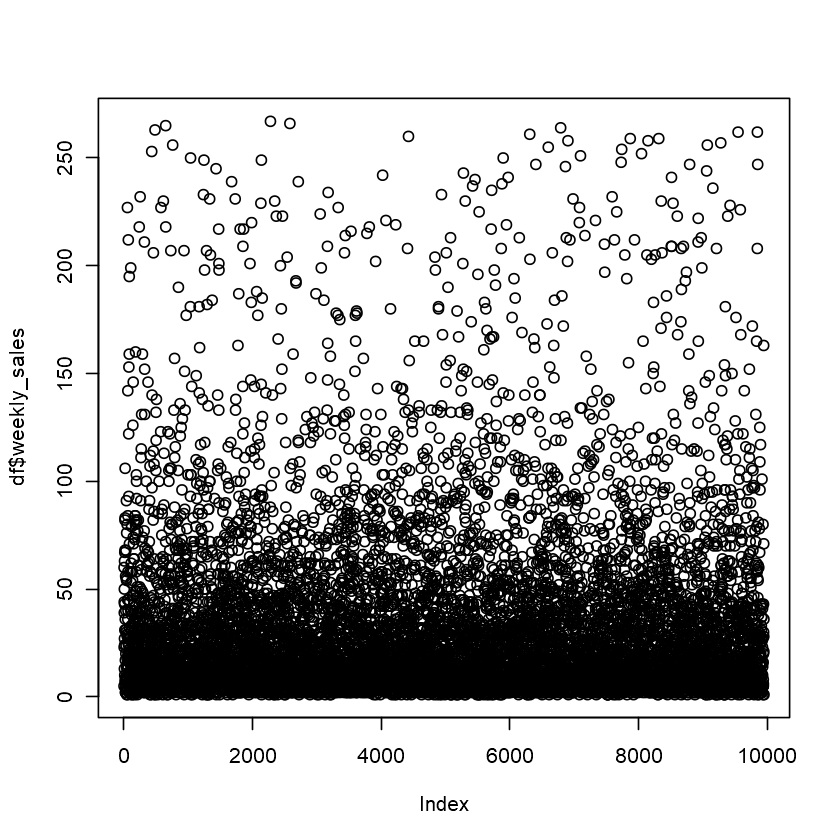

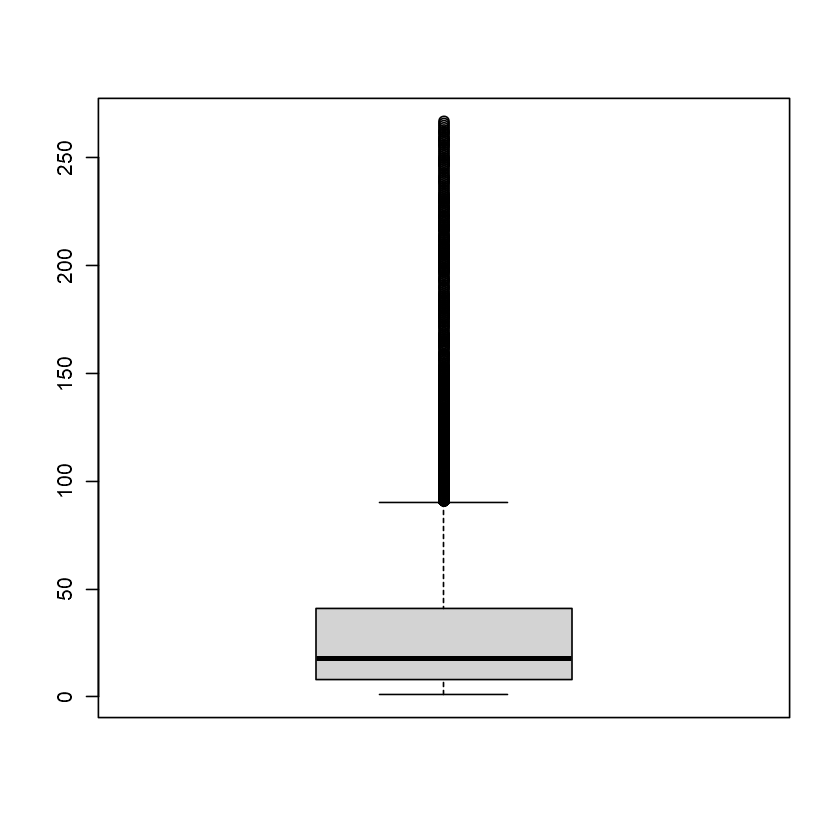

In [29]:
plot(df$weekly_sales)
boxplot(df$weekly_sales)

In [30]:
df$log_weekly_sales <- log(df$weekly_sales+1)

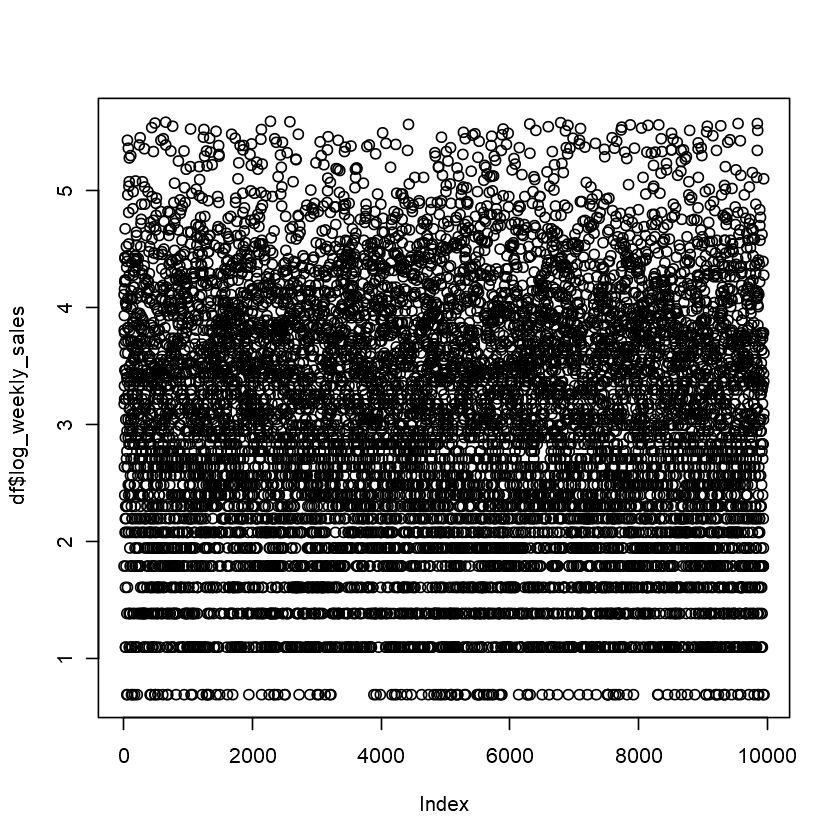

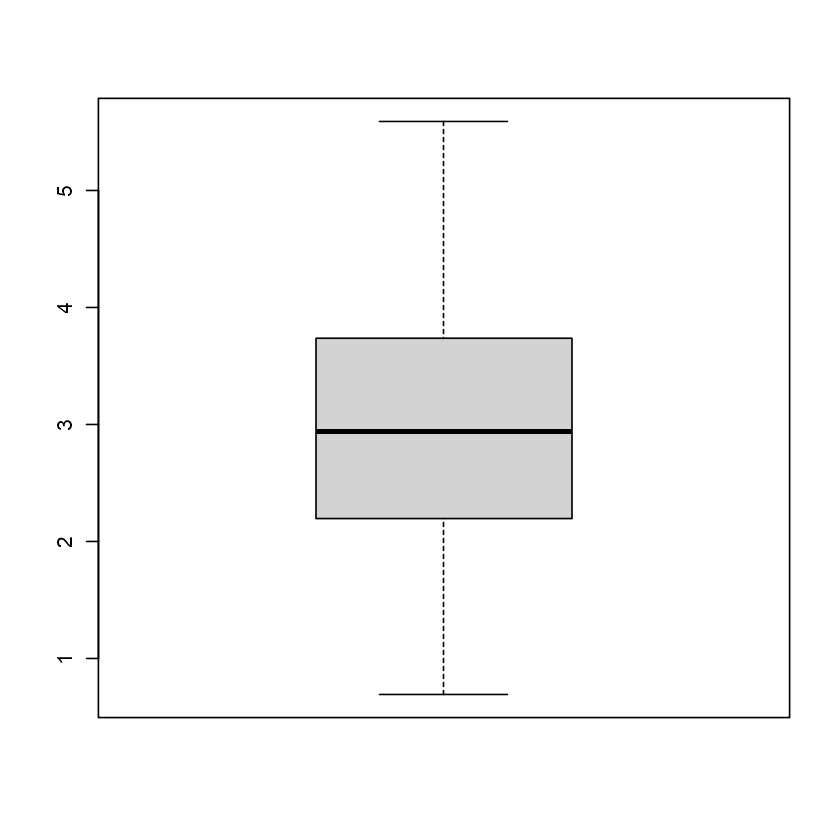

In [31]:
plot(df$log_weekly_sales)
boxplot(df$log_weekly_sales)

In [32]:
summary(df$weekly_sales)
summary(df$log_weekly_sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   18.00   32.09   41.00  267.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6931  2.1972  2.9444  2.9548  3.7377  5.5910 

In [33]:
df1<-df

In [34]:
head(df1)

,YYYYWW,WW,store_nbr,item_nbr,item_class,preishable_item,weekly_sales,weekly_transactions,onpromotion,city,...,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,oil_weekly_avg,oil_weekly_max,oil_weekly_min,EQ_Impact,log_weekly_sales
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,201528,28,46,1247036,2864,1,5,807,True,Quito,...,0,0,0,0,0,114,108,112,0,1.791759
2,201630,30,46,695758,2802,1,60,418,False,Quito,...,0,0,0,0,0,36,33,40,0,4.110874
3,201703,3,47,1247036,2864,1,23,828,False,Quito,...,0,0,0,0,0,110,105,110,0,3.178054
4,201526,26,46,741201,2854,1,44,574,True,Quito,...,0,0,0,0,0,137,137,136,0,3.806662
5,201705,5,47,1110679,2850,1,39,852,False,Quito,...,0,0,0,0,0,120,119,117,0,3.688879
6,201603,3,47,695758,2802,1,50,779,False,Quito,...,0,0,0,0,0,4,3,4,0,3.931826


### Remove the following features:
#### YYYYWW, perishable_item & weekly_sales (log_weekly_sales is used instead) and 

In [35]:
#df1<-df1[,-c(1,6,7)]

In [36]:
df1<-df1[,-c(6,7)]

In [37]:
head(df1)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,oil_weekly_avg,oil_weekly_max,oil_weekly_min,EQ_Impact,log_weekly_sales
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,201528,28,46,1247036,2864,807,True,Quito,Pichincha,0,...,0,0,0,0,0,114,108,112,0,1.791759
2,201630,30,46,695758,2802,418,False,Quito,Pichincha,0,...,0,0,0,0,0,36,33,40,0,4.110874
3,201703,3,47,1247036,2864,828,False,Quito,Pichincha,0,...,0,0,0,0,0,110,105,110,0,3.178054
4,201526,26,46,741201,2854,574,True,Quito,Pichincha,0,...,0,0,0,0,0,137,137,136,0,3.806662
5,201705,5,47,1110679,2850,852,False,Quito,Pichincha,0,...,0,0,0,0,0,120,119,117,0,3.688879
6,201603,3,47,695758,2802,779,False,Quito,Pichincha,0,...,0,0,0,0,0,4,3,4,0,3.931826


In [38]:
### set Characters & Numeric vectors
strlst1 <- NULL
numlst1 <- NULL
for (v in names(df1)) {
    if(typeof(df1[[v]])=='character' | is.factor(df1[[v]])) {
        strlst1 <- c(strlst1,v) 
    } else {
        numlst1 <- c(numlst1, v)
    }
}
strlst1
numlst1

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "onpromotion"                        
 [7] "city"                                "state"                              
 [9] "National_Ecuador_weekly_holidays"    "National_Ecuador_weekly_additionals"
[11] "National_Ecuador_weekly_events"      "National_Ecuador_weekly_bridges"    
[13] "locale_Ambato_weekly_holidays"       "locale_Quito_weekly_holidays"       
[15] "locale_Quito_weekly_additionals"     "EQ_Impact"

[1] "weekly_transactions" "oil_weekly_avg"      "oil_weekly_max"     
[4] "oil_weekly_min"      "log_weekly_sales"

In [39]:
tab1 <- Table1(data=df1)
dftab1<-data.frame(tab1)
dftab1

Warning message in Table1(data = df1):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


V1,V2,Pop
<chr>,<chr>,<chr>
Variables,Categories,Population
Individuals,n,9951
YYYYWW,201301,19 (0.2%)
YYYYWW,201302,19 (0.2%)
YYYYWW,201303,19 (0.2%)
YYYYWW,201304,19 (0.2%)
YYYYWW,201305,19 (0.2%)
YYYYWW,201306,20 (0.2%)
YYYYWW,201307,24 (0.2%)


In [40]:
nm1 <- names(df1)
nm1

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "weekly_transactions"                
 [7] "onpromotion"                         "city"                               
 [9] "state"                               "National_Ecuador_weekly_holidays"   
[11] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[13] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[15] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[17] "oil_weekly_avg"                      "oil_weekly_max"                     
[19] "oil_weekly_min"                      "EQ_Impact"                          
[21] "log_weekly_sales"

In [41]:
## check each of the variable statistics
for (n in nm1[1:length(nm1)-1]) {
    print(n)
    print(tab1[tab1$V1 == n,])
}

[1] "YYYYWW"
# A tibble: 245 x 3
   V1     V2     Pop      
   <chr>  <chr>  <chr>    
 1 YYYYWW 201301 19 (0.2%)
 2 YYYYWW 201302 19 (0.2%)
 3 YYYYWW 201303 19 (0.2%)
 4 YYYYWW 201304 19 (0.2%)
 5 YYYYWW 201305 19 (0.2%)
 6 YYYYWW 201306 20 (0.2%)
 7 YYYYWW 201307 24 (0.2%)
 8 YYYYWW 201308 24 (0.2%)
 9 YYYYWW 201309 24 (0.2%)
10 YYYYWW 201310 24 (0.2%)
# ... with 235 more rows
[1] "WW"
# A tibble: 53 x 3
   V1    V2    Pop       
   <chr> <chr> <chr>     
 1 WW    1     160 (1.6%)
 2 WW    2     190 (1.9%)
 3 WW    3     195 (2.0%)
 4 WW    4     195 (2.0%)
 5 WW    5     198 (2.0%)
 6 WW    6     195 (2.0%)
 7 WW    7     195 (2.0%)
 8 WW    8     202 (2.0%)
 9 WW    9     199 (2.0%)
10 WW    10    207 (2.1%)
# ... with 43 more rows
[1] "store_nbr"
# A tibble: 4 x 3
  V1        V2    Pop          
  <chr>     <chr> <chr>        
1 store_nbr 46    2,582 (25.9%)
2 store_nbr 47    2,636 (26.5%)
3 store_nbr 48    2,557 (25.7%)
4 store_nbr 50    2,176 (21.9%)
[1] "item_nbr"
# A tibble: 7

### Distribution of variables and Relationship with the outcome

In [42]:
suppressWarnings(mechkar::exploreData(data=df1, y="log_weekly_sales"))

  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |===================================================================   |  95%

## Recategories National_Ecuador_weekly_additionals > 1 as '2'  (representNational_Ecuador_weekly_additionals (2,3,4,5)

In [53]:
levels(df1$National_Ecuador_weekly_additionals)[3] <- '2'
levels(df1$National_Ecuador_weekly_additionals)[4] <- '2'
levels(df1$National_Ecuador_weekly_additionals)[5] <- '2'

In [54]:
levels(df1$National_Ecuador_weekly_additionals)

[1] "0" "1" "2"

## Recategories National_Ecuador_weekly_events > 2 as '3'  (representNational_Ecuador_weekly_eventss (3,4,5,6,7,8)

In [52]:
levels(df1$National_Ecuador_weekly_events)[4] <- '3'
levels(df1$National_Ecuador_weekly_events)[5] <- '3'
levels(df1$National_Ecuador_weekly_events)[6] <- '3'
levels(df1$National_Ecuador_weekly_events)[7] <- '3'
levels(df1$National_Ecuador_weekly_events)[8] <- '3'

In [55]:
levels(df1$National_Ecuador_weekly_events)

[1] "0" "1" "2" "3"

In [56]:
exploreData(data.frame(df1),factorSize =3, y="log_weekly_sales") 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 901 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 901 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 901 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |===================================================================   |  95%

## Review the relationship between the categorical values

### Check log_sales vs. Factor variables dist

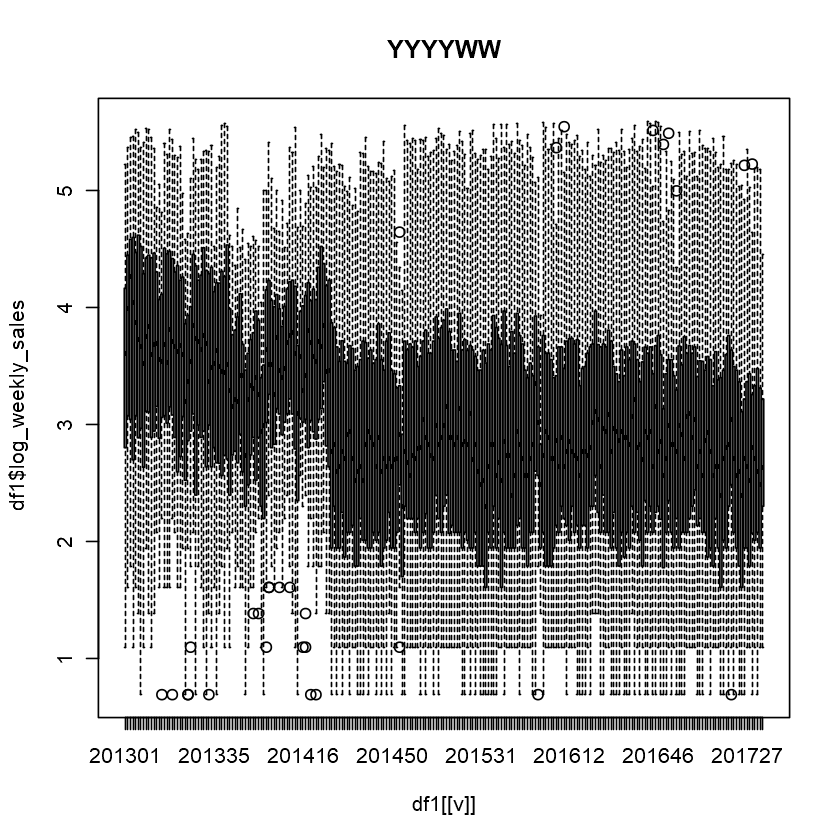

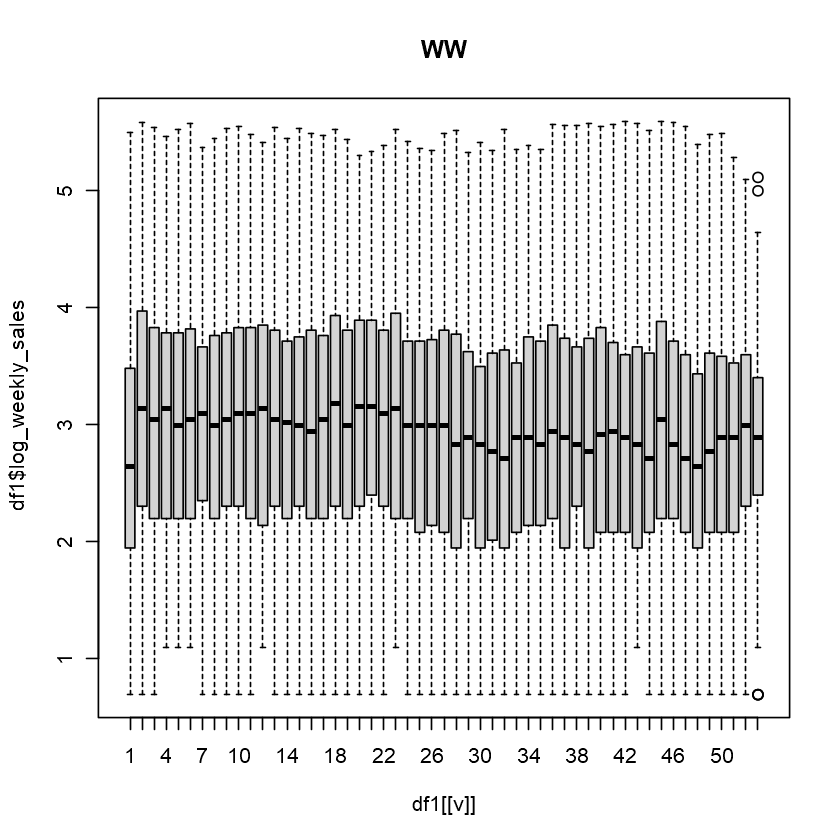

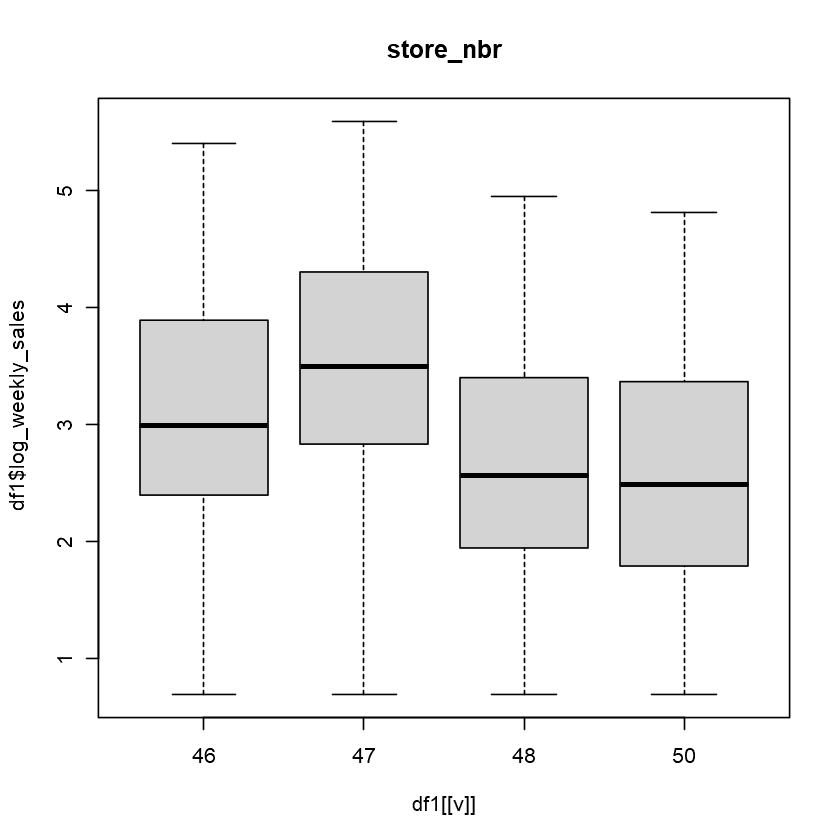

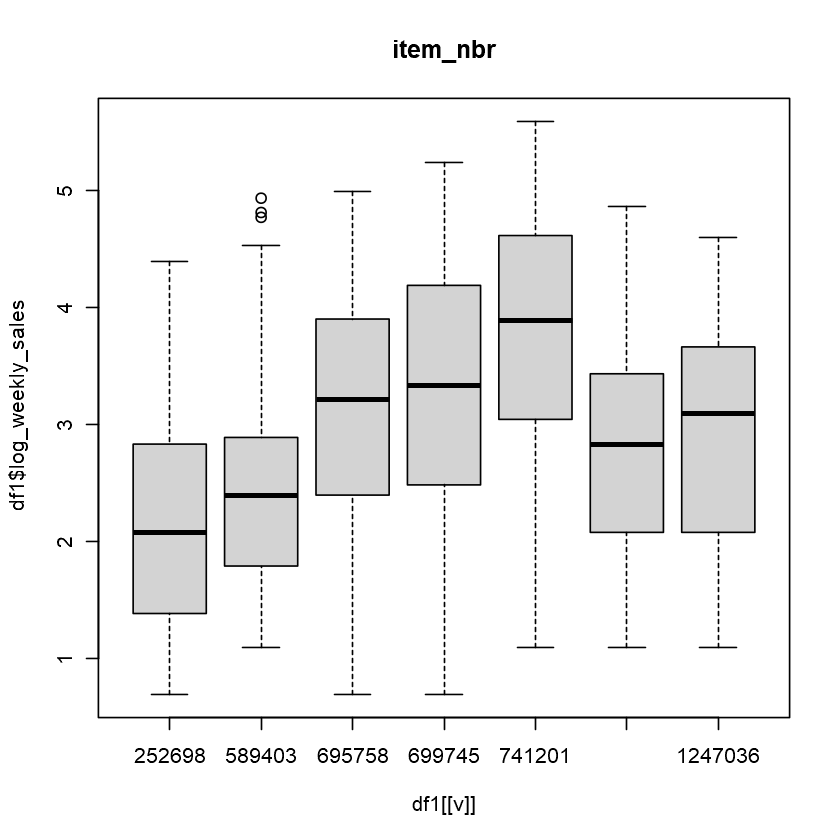

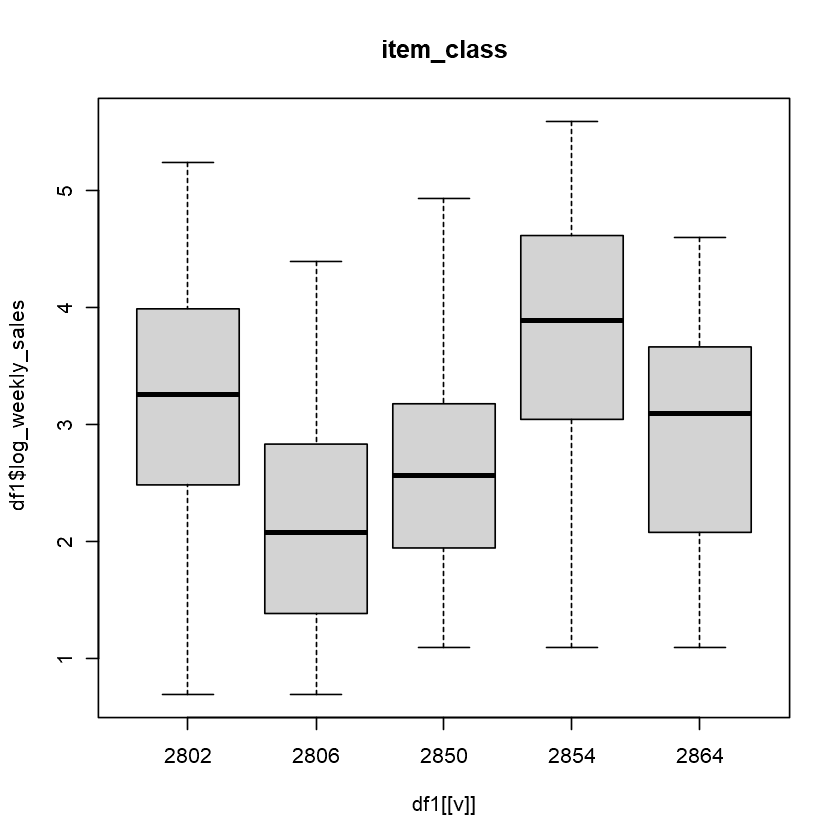

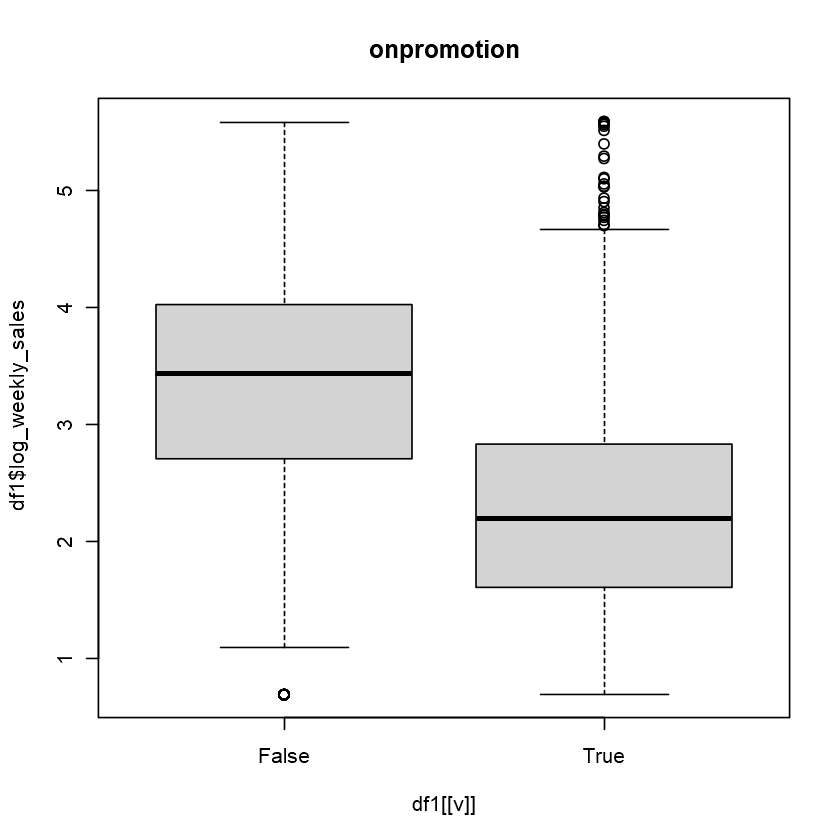

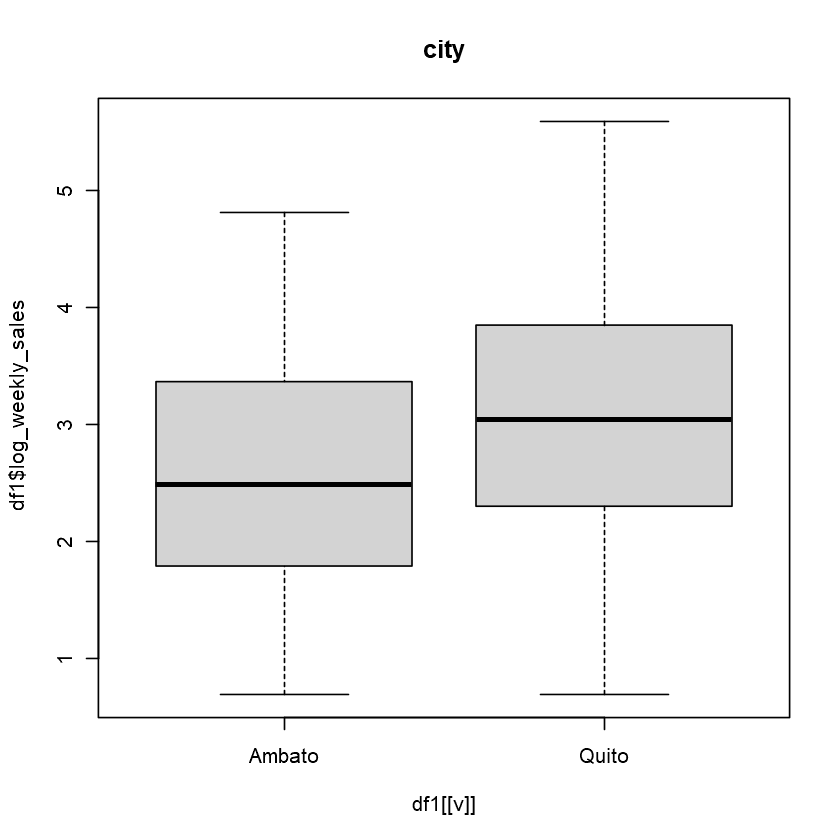

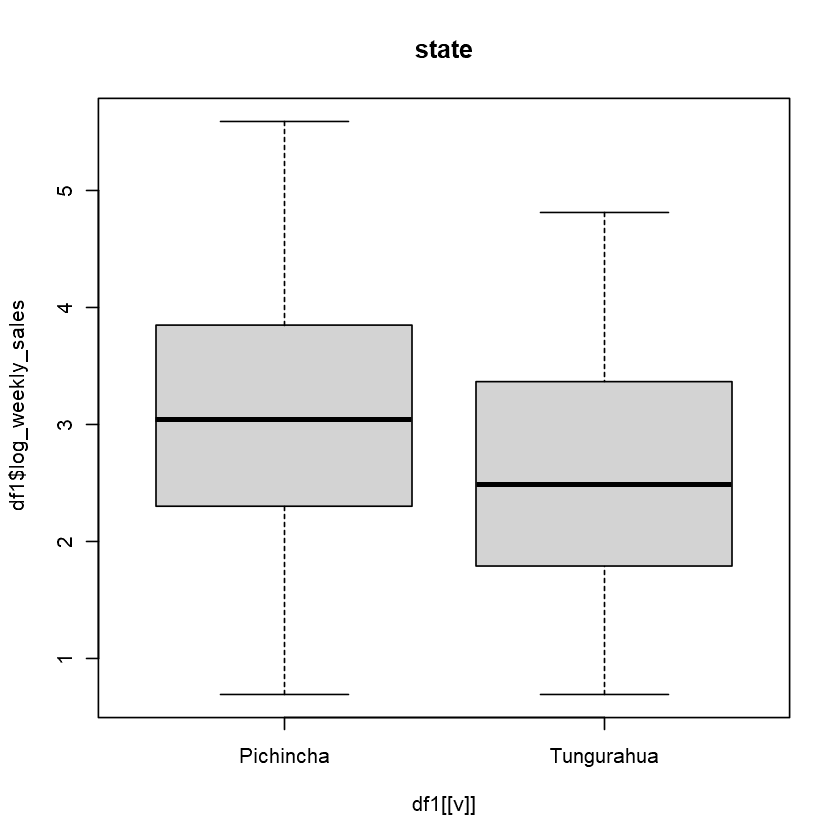

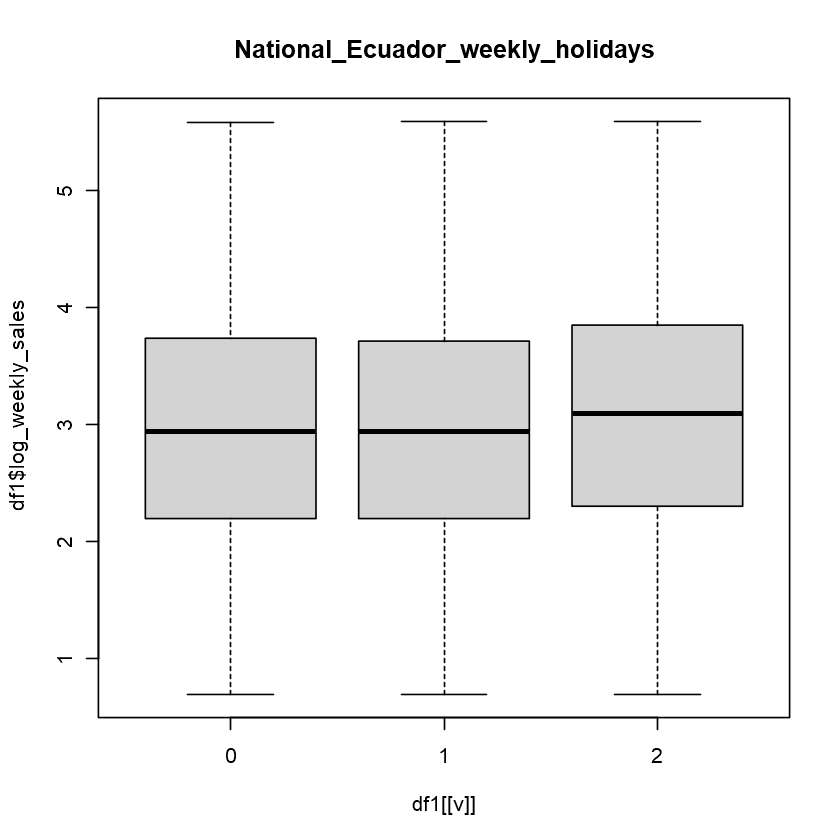

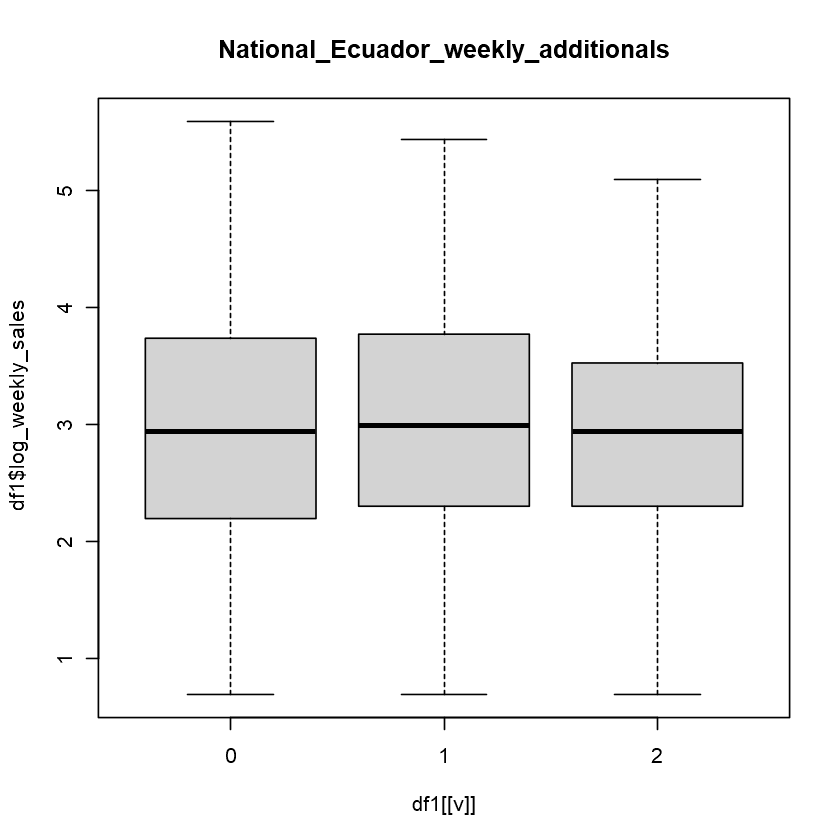

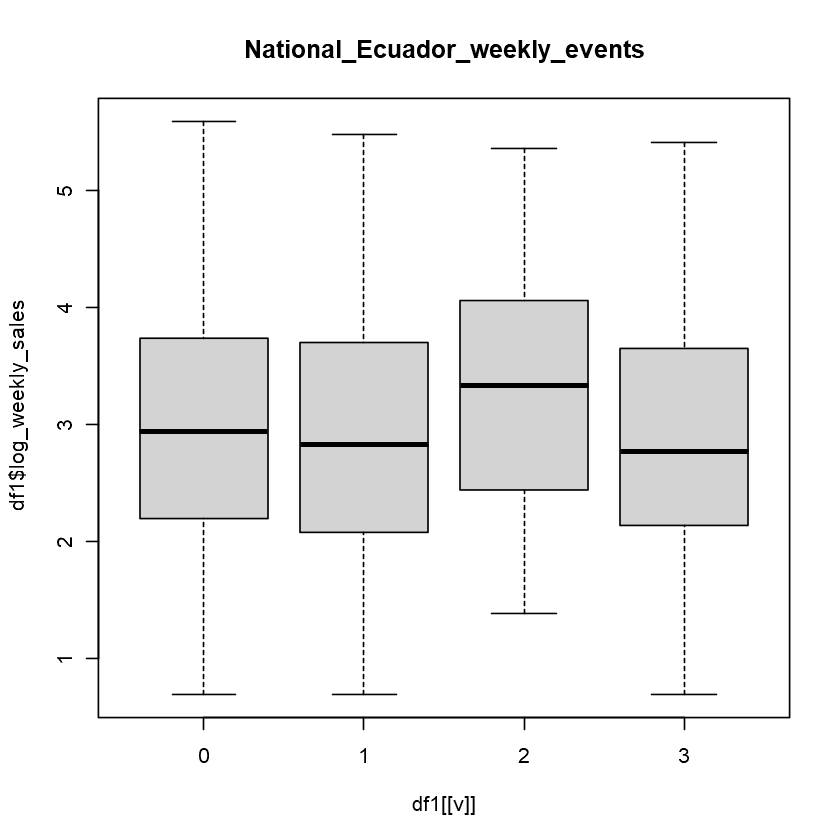

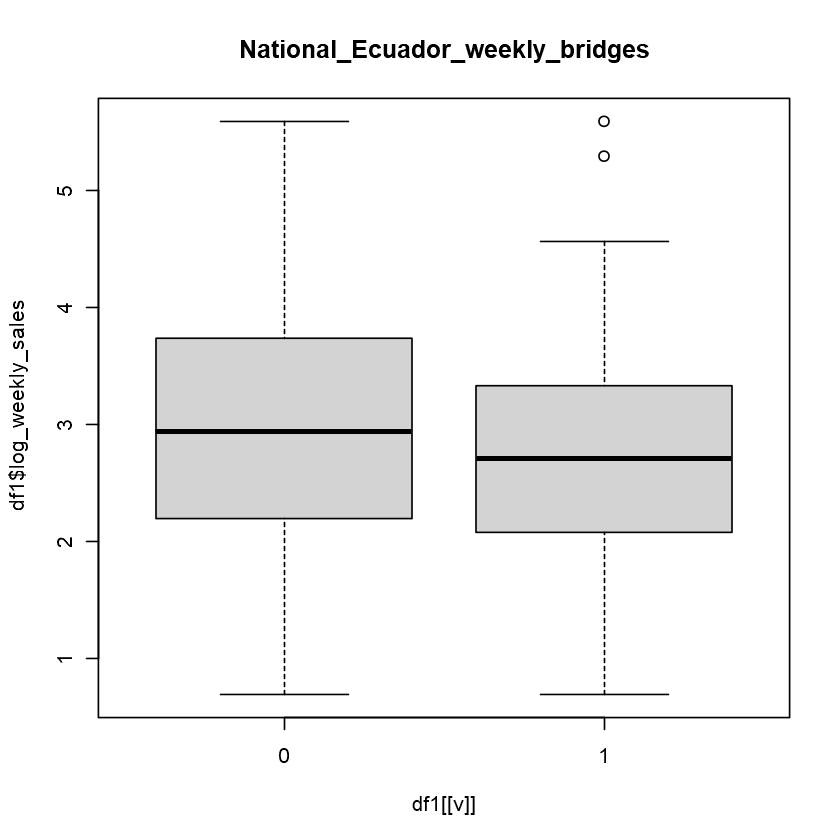

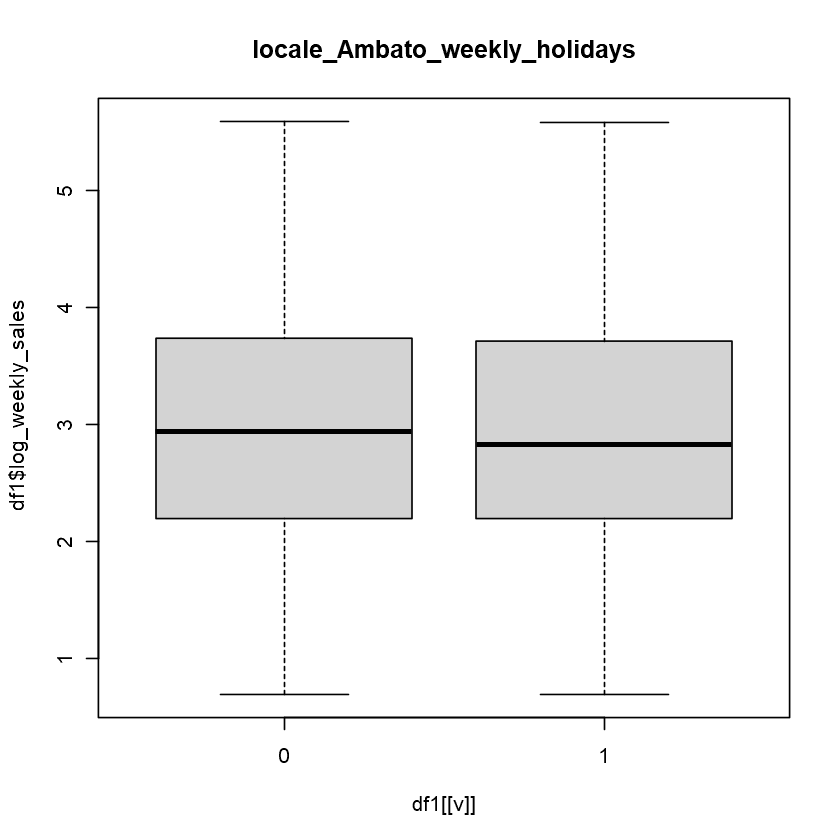

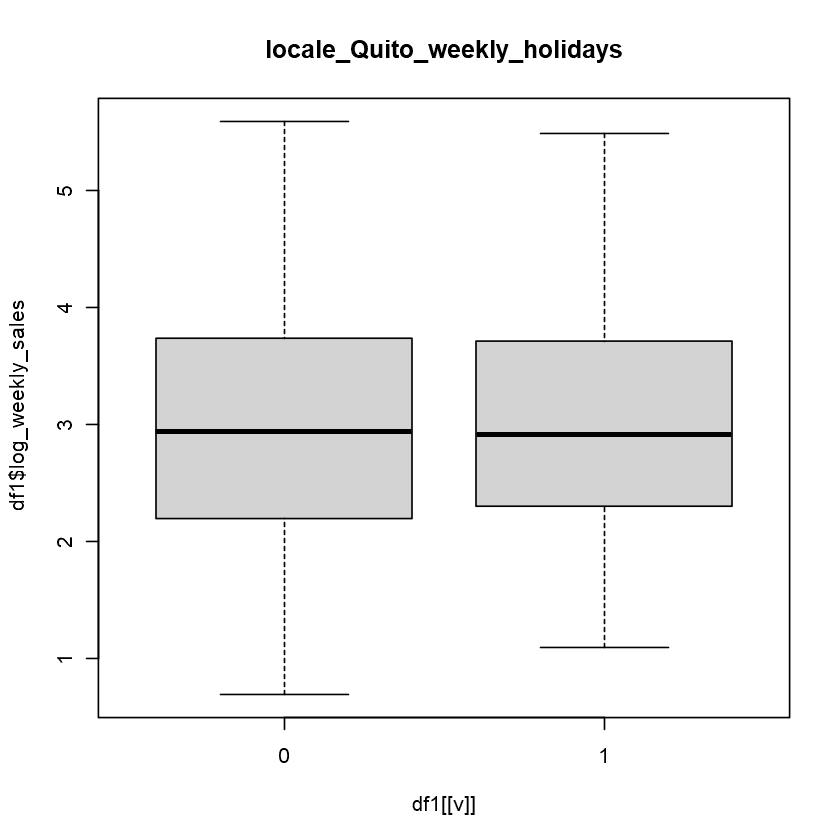

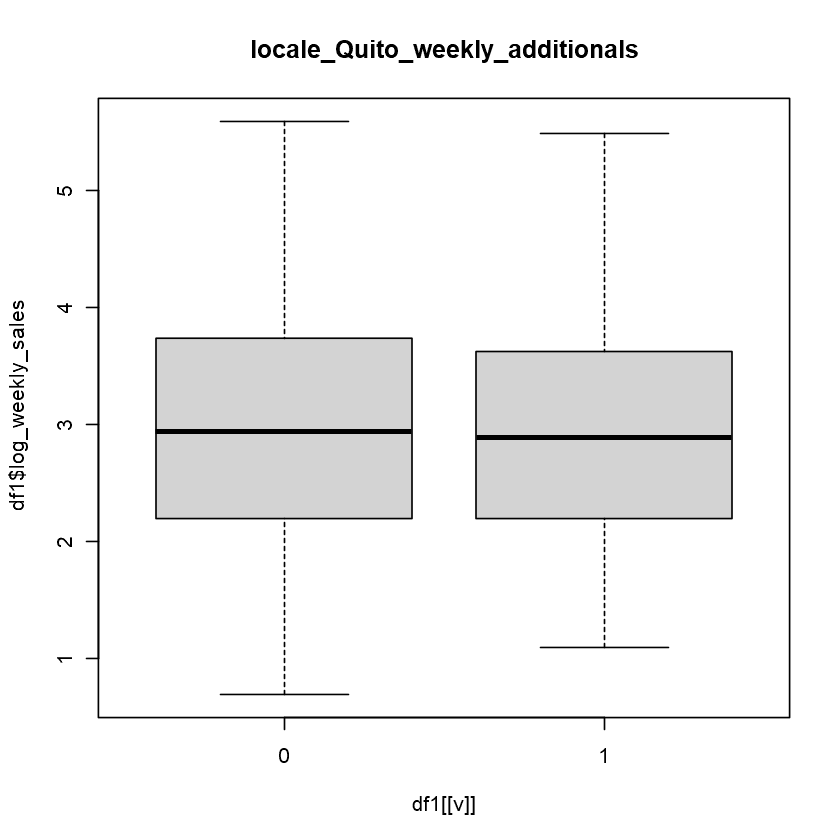

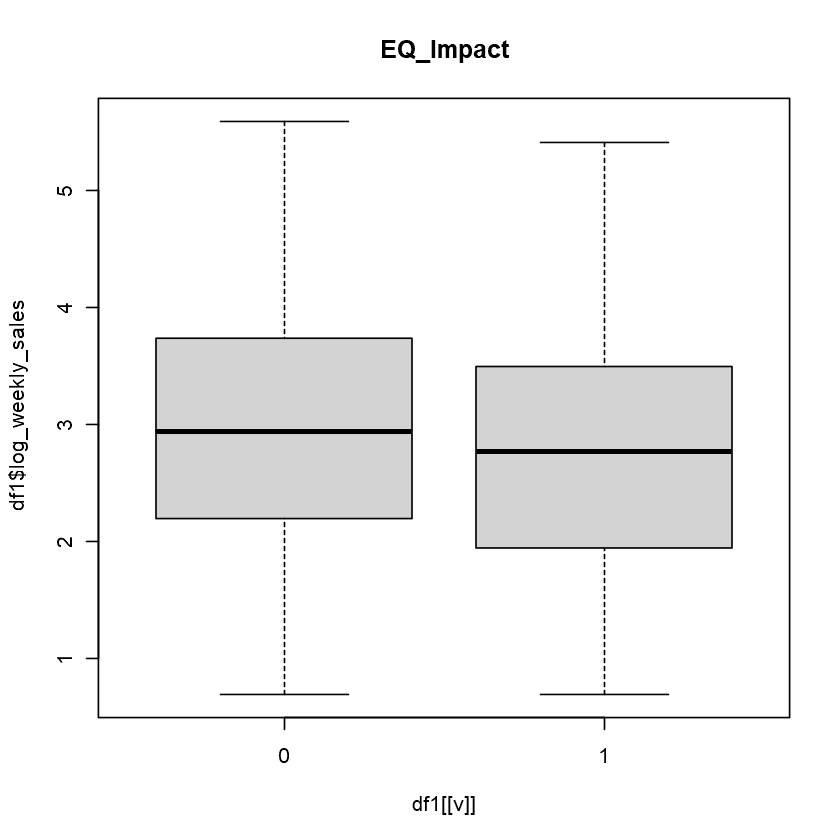

In [57]:
for (v in names(df1)) {
    if(is.factor(df1[[v]])==T) {
        boxplot(df1$log_weekly_sales ~ df1[[v]], main=v)
    }
}

In [58]:
numvar <- NULL

for(v in names(df1)) {
  if(is.numeric(df1[[v]])==TRUE) {
    numvar <- c(numvar, v)
  }  
}

numvar

[1] "weekly_transactions" "oil_weekly_avg"      "oil_weekly_max"     
[4] "oil_weekly_min"      "log_weekly_sales"

In [59]:
library(Hmisc)

cormat <- rcorr(as.matrix(df1[,numvar]))

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




In [60]:
## correlation matrix
cormat1<-round(cormat$r,3)
cormat1<-as.matrix(cormat1)
cormat1


,weekly_transactions,oil_weekly_avg,oil_weekly_max,oil_weekly_min,log_weekly_sales
weekly_transactions,1.000,0.087,0.088,0.082,0.307
oil_weekly_avg,0.087,1.000,0.996,0.997,0.122
oil_weekly_max,0.088,0.996,1.000,0.988,0.122
oil_weekly_min,0.082,0.997,0.988,1.000,0.121
log_weekly_sales,0.307,0.122,0.122,0.121,1.000


In [61]:
## p-values
pmat<-cormat$P
pmat<-as.matrix(pmat)
pmat

,weekly_transactions,oil_weekly_avg,oil_weekly_max,oil_weekly_min,log_weekly_sales
weekly_transactions,NA,0,0,4.440892e-15,0
oil_weekly_avg,0.000000e+00,NA,0,0.000000e+00,0
oil_weekly_max,0.000000e+00,0,NA,0.000000e+00,0
oil_weekly_min,4.440892e-15,0,0,NA,0
log_weekly_sales,0.000000e+00,0,0,0.000000e+00,NA


In [62]:
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
  )
}
numcormat<- data.frame(flattenCorrMatrix(cormat1, pmat))
numcormat

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
weekly_transactions,oil_weekly_avg,0.087,0.000000e+00
weekly_transactions,oil_weekly_max,0.088,0.000000e+00
oil_weekly_avg,oil_weekly_max,0.996,0.000000e+00
weekly_transactions,oil_weekly_min,0.082,4.440892e-15
oil_weekly_avg,oil_weekly_min,0.997,0.000000e+00
oil_weekly_max,oil_weekly_min,0.988,0.000000e+00
weekly_transactions,log_weekly_sales,0.307,0.000000e+00
oil_weekly_avg,log_weekly_sales,0.122,0.000000e+00
oil_weekly_max,log_weekly_sales,0.122,0.000000e+00


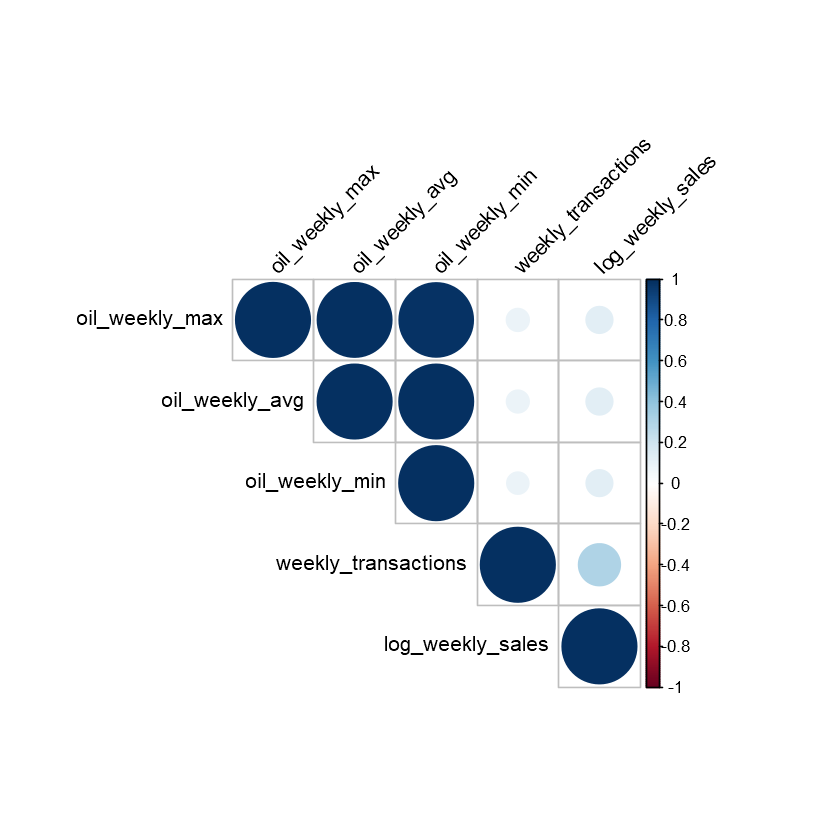

In [64]:
corrplot(cormat1, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45, p.mat = pmat, sig.level = 0.01, insig = "blank")

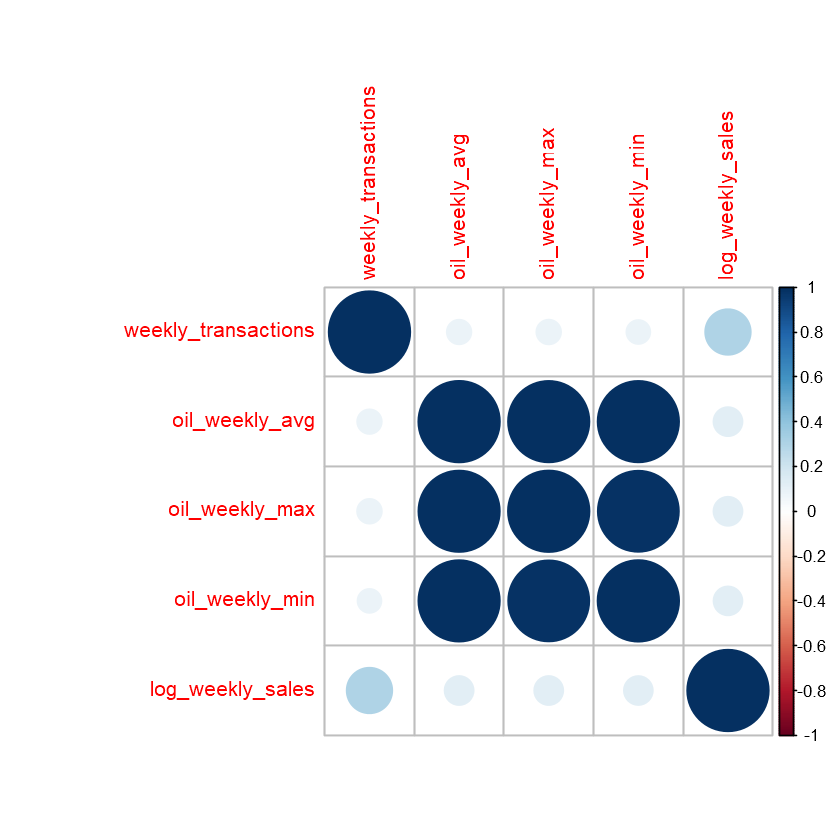

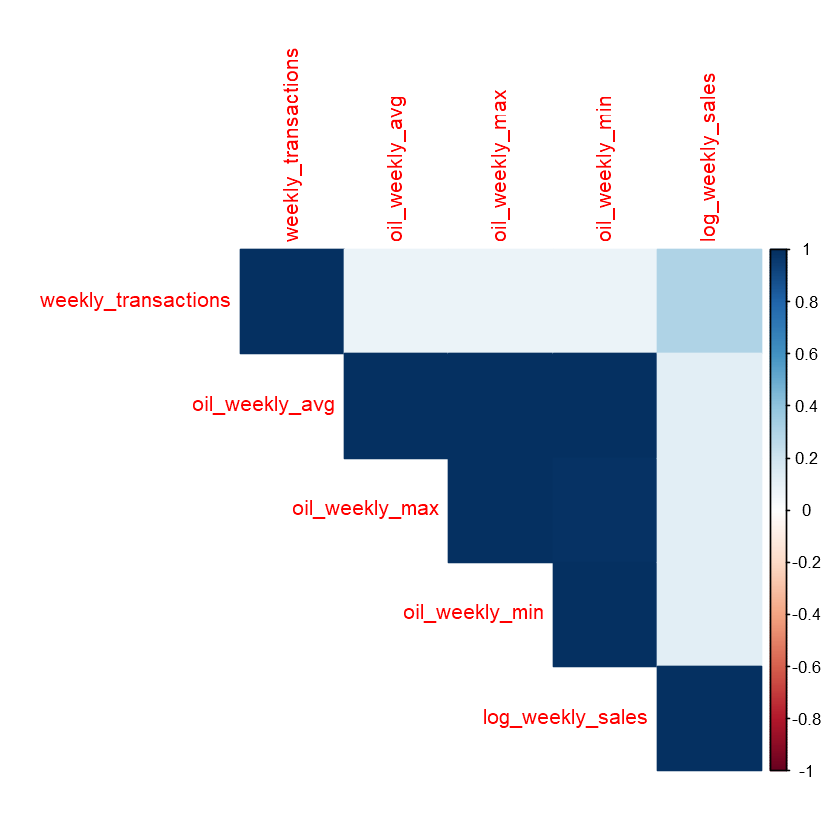

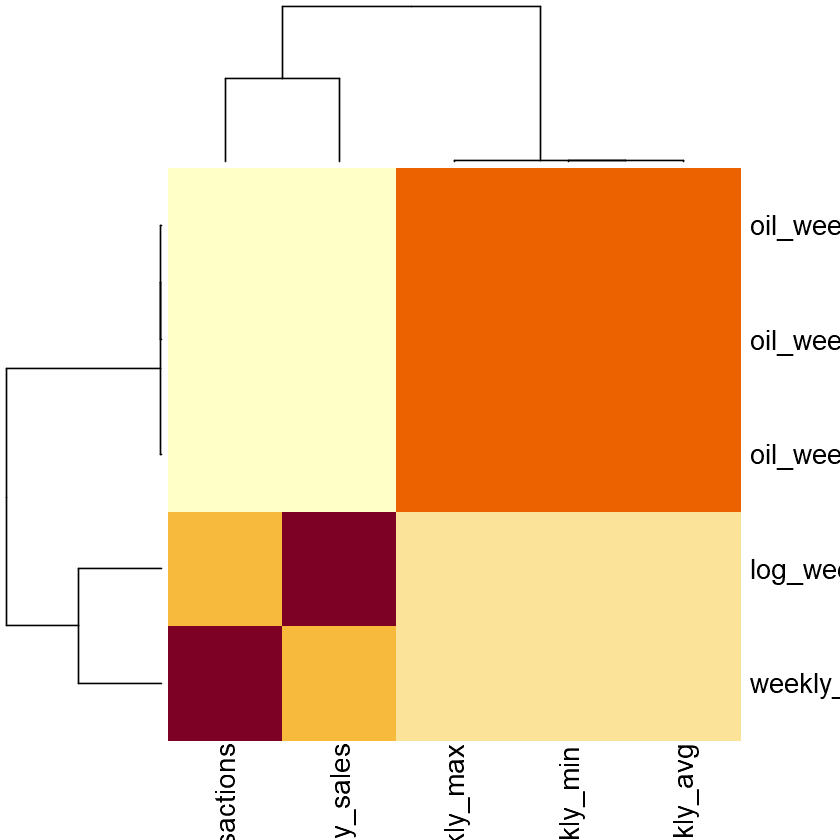

In [65]:
library(corrplot)
corrplot(cormat1)
## base
corrplot(cormat1,type = "upper",method = "color")
## another option:
heatmap(cormat1)


In [66]:
##Cramer's V - a correlation measure for categorial variables based on ChiSquare

In [67]:
names(df1)

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "weekly_transactions"                
 [7] "onpromotion"                         "city"                               
 [9] "state"                               "National_Ecuador_weekly_holidays"   
[11] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[13] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[15] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[17] "oil_weekly_avg"                      "oil_weekly_max"                     
[19] "oil_weekly_min"                      "EQ_Impact"                          
[21] "log_weekly_sales"

In [68]:
summary(df1[,strlst1])
head(df1[,strlst1])
dim(df1[,strlst1])
glimpse(df1[,strlst1])


     YYYYWW           WW       store_nbr    item_nbr    item_class 
 201446 :  56   14     : 230   46:2582   252698 :1237   2802:3026  
 201710 :  56   31     : 223   47:2636   589403 :1310   2806:1237  
 201414 :  55   32     : 222   48:2557   695758 :1495   2850:2834  
 201441 :  55   28     : 220   50:2176   699745 :1531   2854:1570  
 201444 :  55   27     : 213             741201 :1570   2864:1284  
 201452 :  55   30     : 213             1110679:1524              
 (Other):9619   (Other):8630             1247036:1284              
 onpromotion      city             state      National_Ecuador_weekly_holidays
 False:4531   Ambato:2176   Pichincha :7775   0:8569                          
 True :3846   Quito :7775   Tungurahua:2176   1: 994                          
 NA's :1574                                   2: 388                          
                                                                              
                                                             

,YYYYWW,WW,store_nbr,item_nbr,item_class,onpromotion,city,state,National_Ecuador_weekly_holidays,National_Ecuador_weekly_additionals,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,EQ_Impact
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,201528,28,46,1247036,2864,True,Quito,Pichincha,0,0,0,0,0,0,0,0
2,201630,30,46,695758,2802,False,Quito,Pichincha,0,0,0,0,0,0,0,0
3,201703,3,47,1247036,2864,False,Quito,Pichincha,0,0,0,0,0,0,0,0
4,201526,26,46,741201,2854,True,Quito,Pichincha,0,0,0,0,0,0,0,0
5,201705,5,47,1110679,2850,False,Quito,Pichincha,0,0,0,0,0,0,0,0
6,201603,3,47,695758,2802,False,Quito,Pichincha,0,0,0,0,0,0,0,0


[1] 9951   16

Rows: 9,951
Columns: 16
$ YYYYWW                              <fct> 201528, 201630, 201703, 201526,...
$ WW                                  <fct> 28, 30, 3, 26, 5, 3, 52, 27, 16...
$ store_nbr                           <fct> 46, 46, 47, 46, 47, 47, 46, 48,...
$ item_nbr                            <fct> 1247036, 695758, 1247036, 74120...
$ item_class                          <fct> 2864, 2802, 2864, 2854, 2850, 2...
$ onpromotion                         <fct> True, False, False, True, False...
$ city                                <fct> Quito, Quito, Quito, Quito, Qui...
$ state                               <fct> Pichincha, Pichincha, Pichincha...
$ National_Ecuador_weekly_holidays    <fct> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1...
$ National_Ecuador_weekly_additionals <fct> 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2...
$ National_Ecuador_weekly_events      <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ National_Ecuador_weekly_bridges     <fct> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0...
$ locale_Ambato_weekly_holid

In [69]:
strlst1<- NULL
numlst1 <- NULL
strlst1

NULL

In [70]:
for (v in names(df1)) {
    if(typeof(df1[[v]])=='character' | is.factor(df1[[v]])) {
        strlst1 <- c(strlst1,v) 
    } else {
        numlst1 <- c(numlst1, v)
    }
}
strlst1
numlst1

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "onpromotion"                        
 [7] "city"                                "state"                              
 [9] "National_Ecuador_weekly_holidays"    "National_Ecuador_weekly_additionals"
[11] "National_Ecuador_weekly_events"      "National_Ecuador_weekly_bridges"    
[13] "locale_Ambato_weekly_holidays"       "locale_Quito_weekly_holidays"       
[15] "locale_Quito_weekly_additionals"     "EQ_Impact"

[1] "weekly_transactions" "oil_weekly_avg"      "oil_weekly_max"     
[4] "oil_weekly_min"      "log_weekly_sales"

In [71]:
summary(df1[,strlst1])

     YYYYWW           WW       store_nbr    item_nbr    item_class 
 201446 :  56   14     : 230   46:2582   252698 :1237   2802:3026  
 201710 :  56   31     : 223   47:2636   589403 :1310   2806:1237  
 201414 :  55   32     : 222   48:2557   695758 :1495   2850:2834  
 201441 :  55   28     : 220   50:2176   699745 :1531   2854:1570  
 201444 :  55   27     : 213             741201 :1570   2864:1284  
 201452 :  55   30     : 213             1110679:1524              
 (Other):9619   (Other):8630             1247036:1284              
 onpromotion      city             state      National_Ecuador_weekly_holidays
 False:4531   Ambato:2176   Pichincha :7775   0:8569                          
 True :3846   Quito :7775   Tungurahua:2176   1: 994                          
 NA's :1574                                   2: 388                          
                                                                              
                                                             

In [72]:
cv.test = function(x,y) {
  dd = chisq.test(x, y, correct=FALSE)
  CV = sqrt(dd$statistic /
    (length(x) * (min(length(unique(x)),length(unique(y))) - 1)))
    #print.noquote("Cramer V / Phi:")
  return(cbind('Cramer V'=as.numeric(CV),'p-value'=dd$p.value))
}


In [73]:
cats_corr <- NULL
for (i in strlst1) {
    for (j in strlst1){
        cats_corr <- rbind(cats_corr,cbind(i,j,(cv.test(df1[[i]],df1[[j]]))))
        #cats_corr <- data.frame(cats_corr)
        row.names(cats_corr) <- NULL
        #cats_corr$Cramer.V <- round(as.numeric(cats_corr$Cramer.V),5)
        #cats_corr$p.value <- round(as.numeric(cats_corr$p.value),5)
    }
}
cats_corr <- data.frame(cats_corr)
cats_corr$Cramer.V <- round(as.numeric(cats_corr$Cramer.V),5)
cats_corr$p.value <- round(as.numeric(cats_corr$p.value),5)

cats_corr_sig<-cats_corr%>% filter(p.value<=0.05) 
cats_corr_sig_dominant<-cats_corr_sig%>% filter(Cramer.V>=0.3) 
#cats_corr[1:25,]


Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning me

Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"


In [74]:
cats_corr_sig_dominant[1:50,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
1,YYYYWW,YYYYWW,1.00000,0
2,YYYYWW,WW,1.00000,0
3,YYYYWW,National_Ecuador_weekly_holidays,1.00000,0
4,YYYYWW,National_Ecuador_weekly_additionals,1.00000,0
5,YYYYWW,National_Ecuador_weekly_events,1.00000,0
6,YYYYWW,National_Ecuador_weekly_bridges,1.00000,0
7,YYYYWW,locale_Ambato_weekly_holidays,1.00000,0
8,YYYYWW,locale_Quito_weekly_holidays,1.00000,0
9,YYYYWW,locale_Quito_weekly_additionals,1.00000,0


In [75]:
cats_corr_sig_dominant[1:50,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
1,YYYYWW,YYYYWW,1.00000,0
2,YYYYWW,WW,1.00000,0
3,YYYYWW,National_Ecuador_weekly_holidays,1.00000,0
4,YYYYWW,National_Ecuador_weekly_additionals,1.00000,0
5,YYYYWW,National_Ecuador_weekly_events,1.00000,0
6,YYYYWW,National_Ecuador_weekly_bridges,1.00000,0
7,YYYYWW,locale_Ambato_weekly_holidays,1.00000,0
8,YYYYWW,locale_Quito_weekly_holidays,1.00000,0
9,YYYYWW,locale_Quito_weekly_additionals,1.00000,0


In [76]:
cats_corr_sig[1:50,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
1,YYYYWW,YYYYWW,1.00000,0.00000
2,YYYYWW,WW,1.00000,0.00000
3,YYYYWW,onpromotion,0.14937,0.00000
4,YYYYWW,National_Ecuador_weekly_holidays,1.00000,0.00000
5,YYYYWW,National_Ecuador_weekly_additionals,1.00000,0.00000
6,YYYYWW,National_Ecuador_weekly_events,1.00000,0.00000
7,YYYYWW,National_Ecuador_weekly_bridges,1.00000,0.00000
8,YYYYWW,locale_Ambato_weekly_holidays,1.00000,0.00000
9,YYYYWW,locale_Quito_weekly_holidays,1.00000,0.00000


In [77]:
cats_corr_sig[51:100,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
51,city,item_nbr,0.09065,0.00000
52,city,item_class,0.08896,0.00000
53,city,onpromotion,0.02821,0.00489
54,city,city,1.00000,0.00000
55,city,state,1.00000,0.00000
56,state,store_nbr,1.00000,0.00000
57,state,item_nbr,0.09065,0.00000
58,state,item_class,0.08896,0.00000
59,state,onpromotion,0.02821,0.00489


In [78]:
cats_corr_sig[101:114,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
101,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,0.02306,0.02142
102,locale_Ambato_weekly_holidays,YYYYWW,1.00000,0.00000
103,locale_Ambato_weekly_holidays,WW,0.93760,0.00000
104,locale_Ambato_weekly_holidays,National_Ecuador_weekly_holidays,0.07461,0.00000
105,locale_Ambato_weekly_holidays,National_Ecuador_weekly_additionals,0.04296,0.00010
106,locale_Ambato_weekly_holidays,National_Ecuador_weekly_events,0.06032,0.00000
107,locale_Ambato_weekly_holidays,National_Ecuador_weekly_bridges,0.02306,0.02142
108,locale_Ambato_weekly_holidays,locale_Ambato_weekly_holidays,1.00000,0.00000
109,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,0.02435,0.01516


In [79]:
#   Outcome

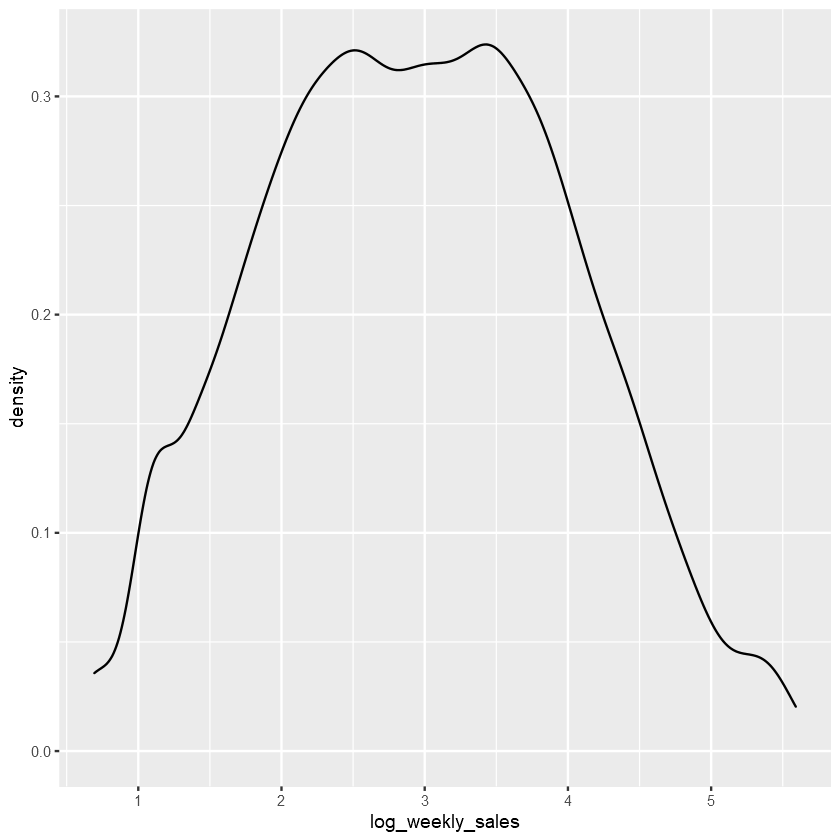

In [80]:
library(ggplot2)

ggplot(data=df1,aes(x=log_weekly_sales)) +
 geom_density()


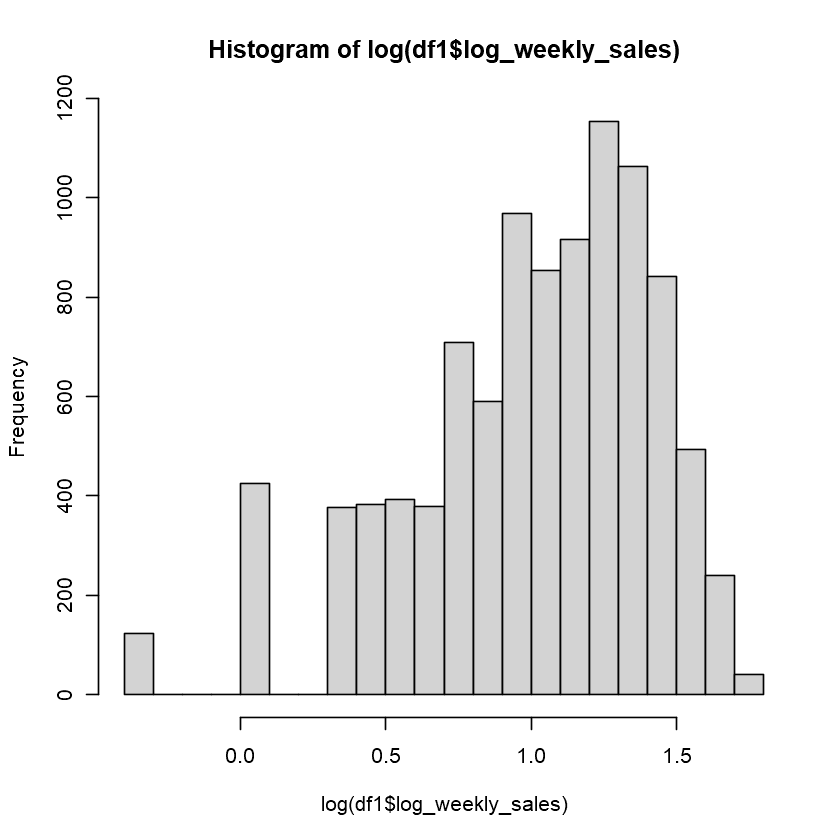

In [81]:
hist(log(df1$log_weekly_sales))

#         Outliers Check

In [82]:
data<-df1
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[v] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}


In [83]:
####    Individual variables analysis

In [84]:
df_out <- outlierMatrix(df1)
head(df_out)


,weekly_transactions,oil_weekly_avg,oil_weekly_max,oil_weekly_min,log_weekly_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0


In [85]:
#table <- Table1(data=df_out)
summary(df_out)

 weekly_transactions oil_weekly_avg oil_weekly_max oil_weekly_min
 Min.   :0           Min.   :0      Min.   :0      Min.   :0     
 1st Qu.:0           1st Qu.:0      1st Qu.:0      1st Qu.:0     
 Median :0           Median :0      Median :0      Median :0     
 Mean   :0           Mean   :0      Mean   :0      Mean   :0     
 3rd Qu.:0           3rd Qu.:0      3rd Qu.:0      3rd Qu.:0     
 Max.   :0           Max.   :0      Max.   :0      Max.   :0     
                     NA's   :901    NA's   :901    NA's   :901   
 log_weekly_sales
 Min.   :0       
 1st Qu.:0       
 Median :0       
 Mean   :0       
 3rd Qu.:0       
 Max.   :0       
                 

In [86]:
outmat <- outlierMatrix(df1)
summary(outmat)

 weekly_transactions oil_weekly_avg oil_weekly_max oil_weekly_min
 Min.   :0           Min.   :0      Min.   :0      Min.   :0     
 1st Qu.:0           1st Qu.:0      1st Qu.:0      1st Qu.:0     
 Median :0           Median :0      Median :0      Median :0     
 Mean   :0           Mean   :0      Mean   :0      Mean   :0     
 3rd Qu.:0           3rd Qu.:0      3rd Qu.:0      3rd Qu.:0     
 Max.   :0           Max.   :0      Max.   :0      Max.   :0     
                     NA's   :901    NA's   :901    NA's   :901   
 log_weekly_sales
 Min.   :0       
 1st Qu.:0       
 Median :0       
 Mean   :0       
 3rd Qu.:0       
 Max.   :0       
                 

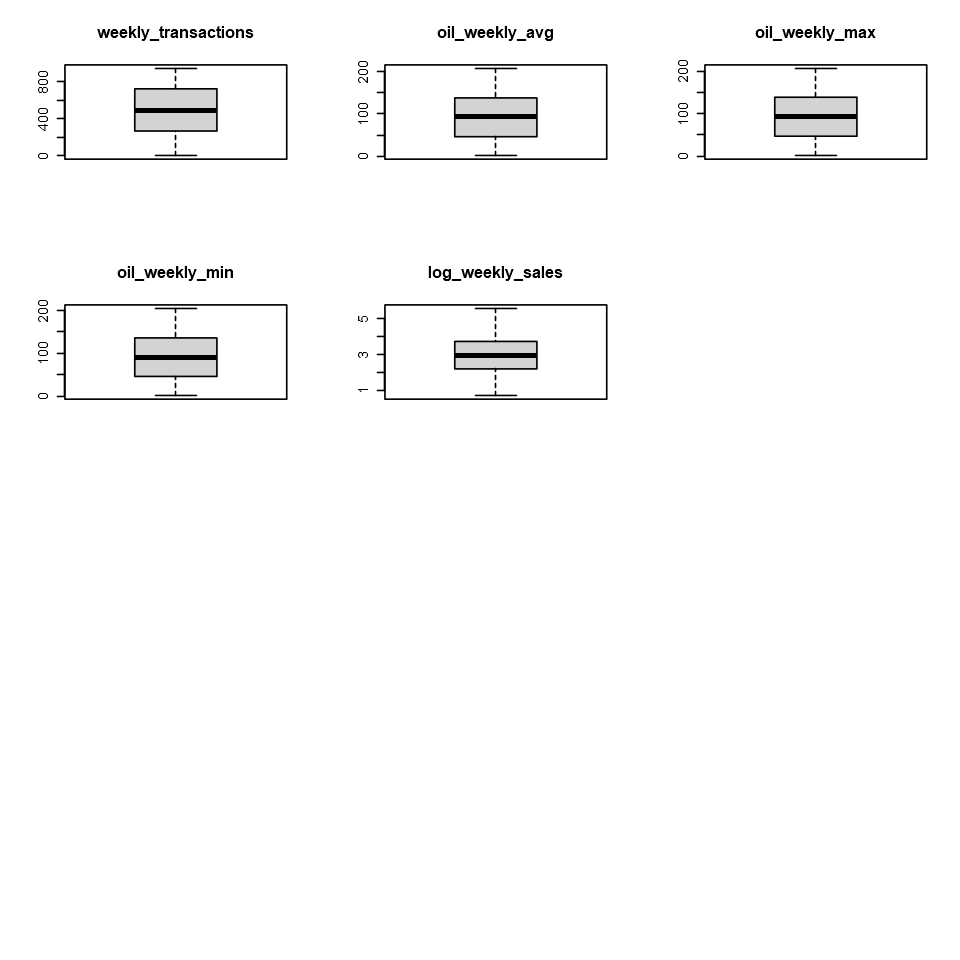

In [87]:
## Visual determination of univariate outliers using boxplots 
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(df1)) {
    if(is.numeric(df1[[v]])==T){
    boxplot(df1[[v]],main=v)
        }
}
#par(mfrow=c(1,1))





In [88]:
# No Outliers found among the numeric varaibles

In [89]:
# what about the log_sales outliers among different variables catagories??? Thomas said to ignore

#  Missing Values

In [90]:
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}

getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [91]:
mm <- getMissingness(data = df1)

[[1]]
             var na.count rate
1    onpromotion     1574 15.8
2 oil_weekly_avg      901  9.1
3 oil_weekly_max      901  9.1
4 oil_weekly_min      901  9.1

[[2]]
[1] "This dataset has 7888 (79.3%) complete rows. Original data has 9951 rows."



In [92]:
mm$missingness

var,na.count,rate
<chr>,<dbl>,<dbl>
onpromotion,1574,15.8
oil_weekly_avg,901,9.1
oil_weekly_max,901,9.1
oil_weekly_min,901,9.1


In [93]:
mm$missingness$var

[1] "onpromotion"    "oil_weekly_avg" "oil_weekly_max" "oil_weekly_min"

In [94]:
#generate a missing matrix
df_na <- missingMatrix(df1)

Warning message:
"package 'naniar' was built under R version 4.0.2"


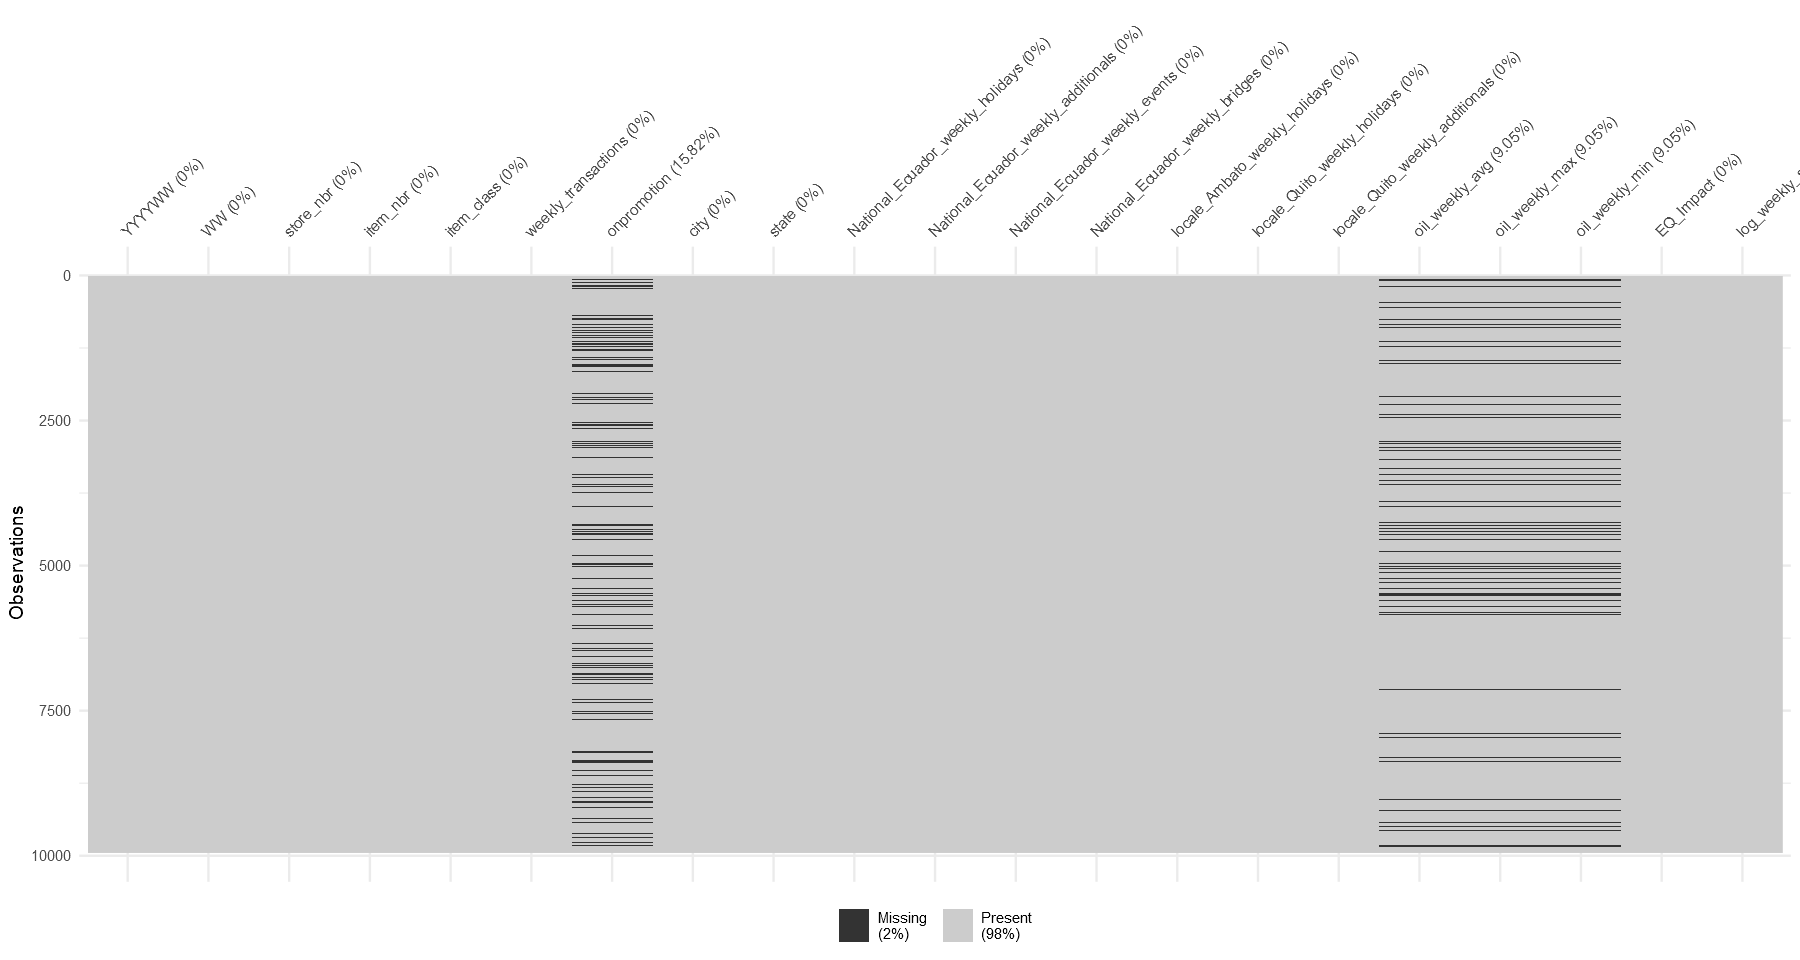

In [95]:
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 8)
vis_miss(df1,warn_large_data=F)

In [96]:
# Now we can check for the number of missing per rows. This will help to ensure if there are rows the we have to drop.

In [97]:
dfna_sum <- df_na
dfna_sum$pct <- rowSums(df_na)/ncol(df_na)
dfna_sum %>% group_by(pct) %>% tally



pct,n
<dbl>,<int>
0.00000000,7888
0.04761905,1162
0.14285714,489
0.19047619,412


In [98]:
# check any correlation between the missing values by making a correlation matrix for the missingness (missing matrix)

In [99]:
mmrevised <- getMissingness(data = df1)
mmrevised$missingness$var

[[1]]
             var na.count rate
1    onpromotion     1574 15.8
2 oil_weekly_avg      901  9.1
3 oil_weekly_max      901  9.1
4 oil_weekly_min      901  9.1

[[2]]
[1] "This dataset has 7888 (79.3%) complete rows. Original data has 9951 rows."



[1] "onpromotion"    "oil_weekly_avg" "oil_weekly_max" "oil_weekly_min"

In [100]:
df_na <- df_na[,mmrevised$missingness$var]
head(df_na)
summary(df_na)

,onpromotion,oil_weekly_avg,oil_weekly_max,oil_weekly_min
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0


  onpromotion     oil_weekly_avg    oil_weekly_max    oil_weekly_min   
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.1582   Mean   :0.09054   Mean   :0.09054   Mean   :0.09054  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  

Warning message:
"Removed 901 rows containing non-finite values (stat_density)."
Warning message:
"Removed 901 rows containing non-finite values (stat_density)."
Warning message:
"Removed 901 rows containing non-finite values (stat_density)."
Warning message:
"Removed 901 rows containing non-finite values (stat_density)."
Warning message:
"Removed 901 rows containing non-finite values (stat_density)."


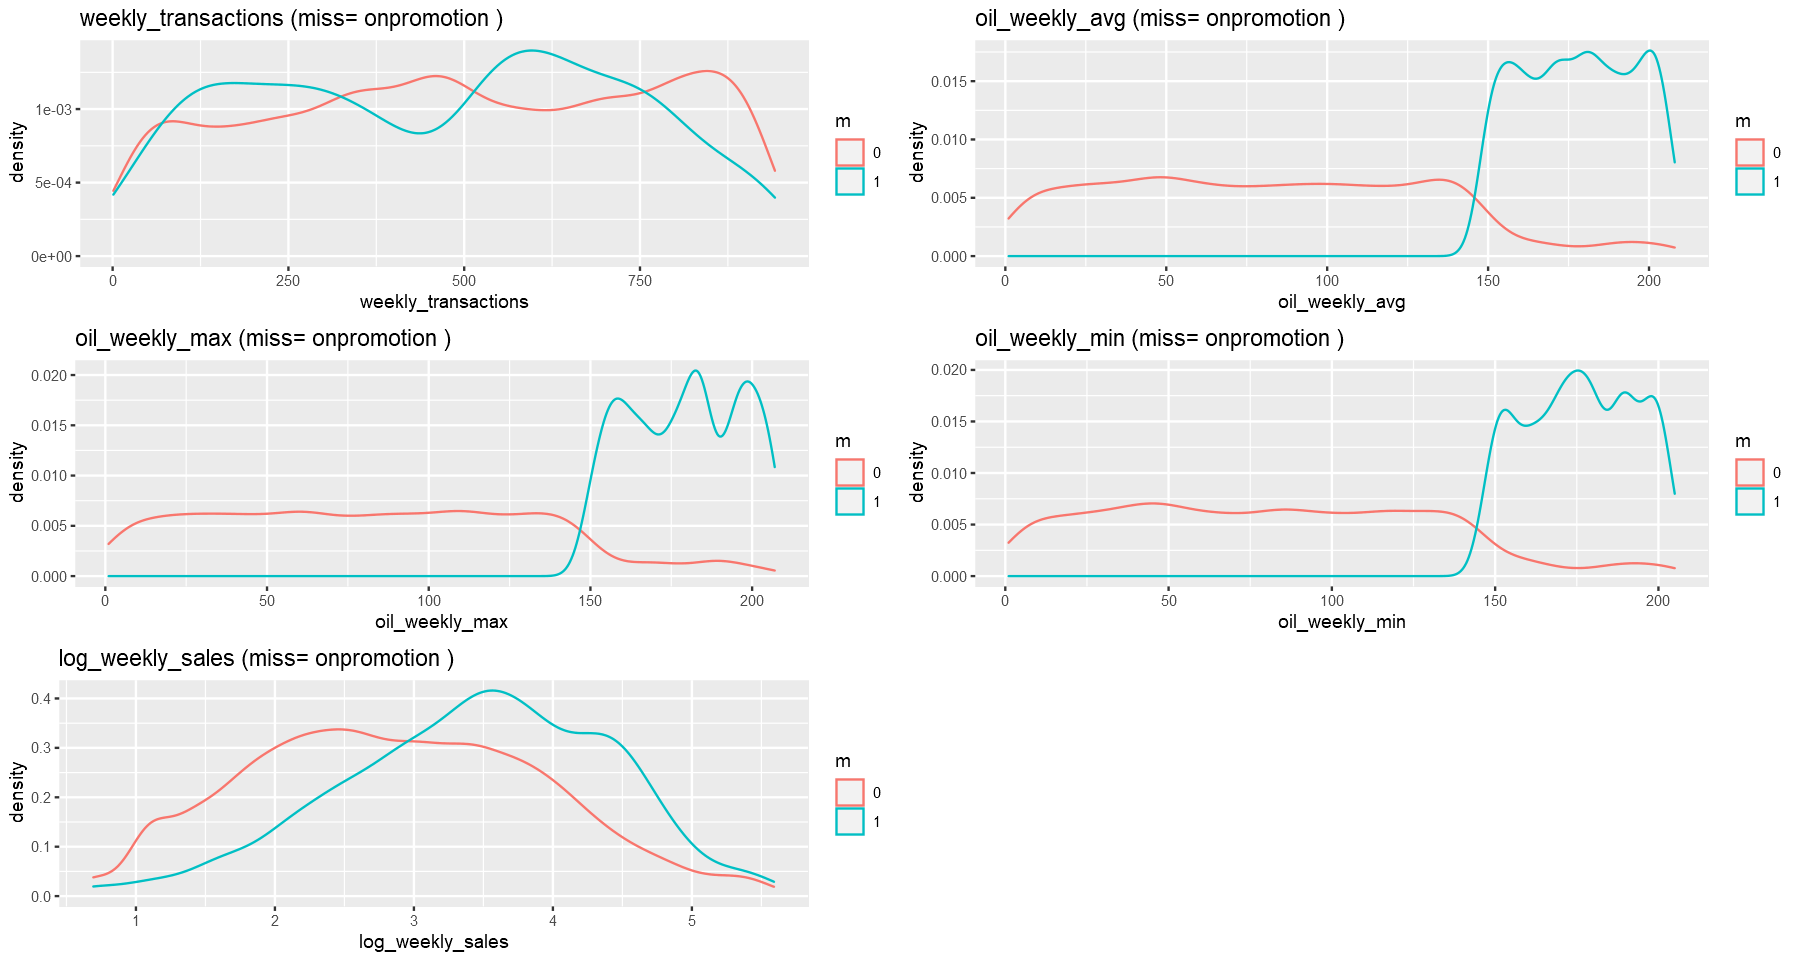

Warning message:
"Removed 901 rows containing non-finite values (stat_density)."
Warning message:
"Removed 901 rows containing non-finite values (stat_density)."


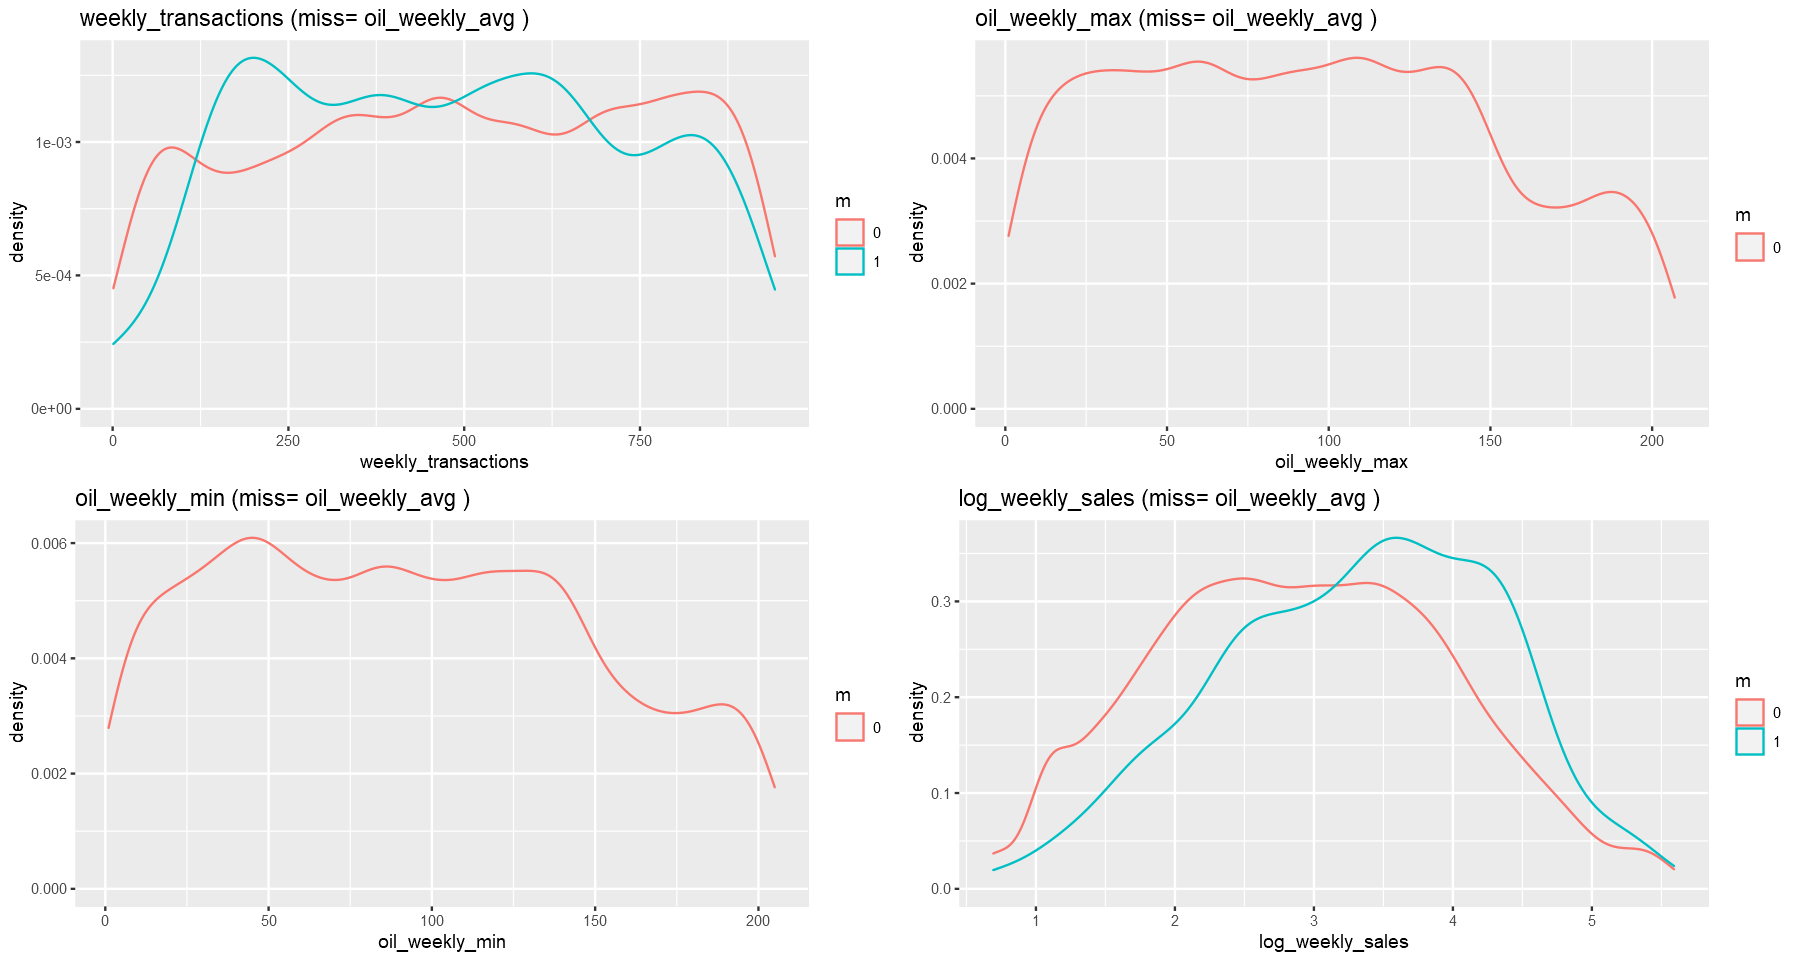

Warning message:
"Removed 901 rows containing non-finite values (stat_density)."
Warning message:
"Removed 901 rows containing non-finite values (stat_density)."


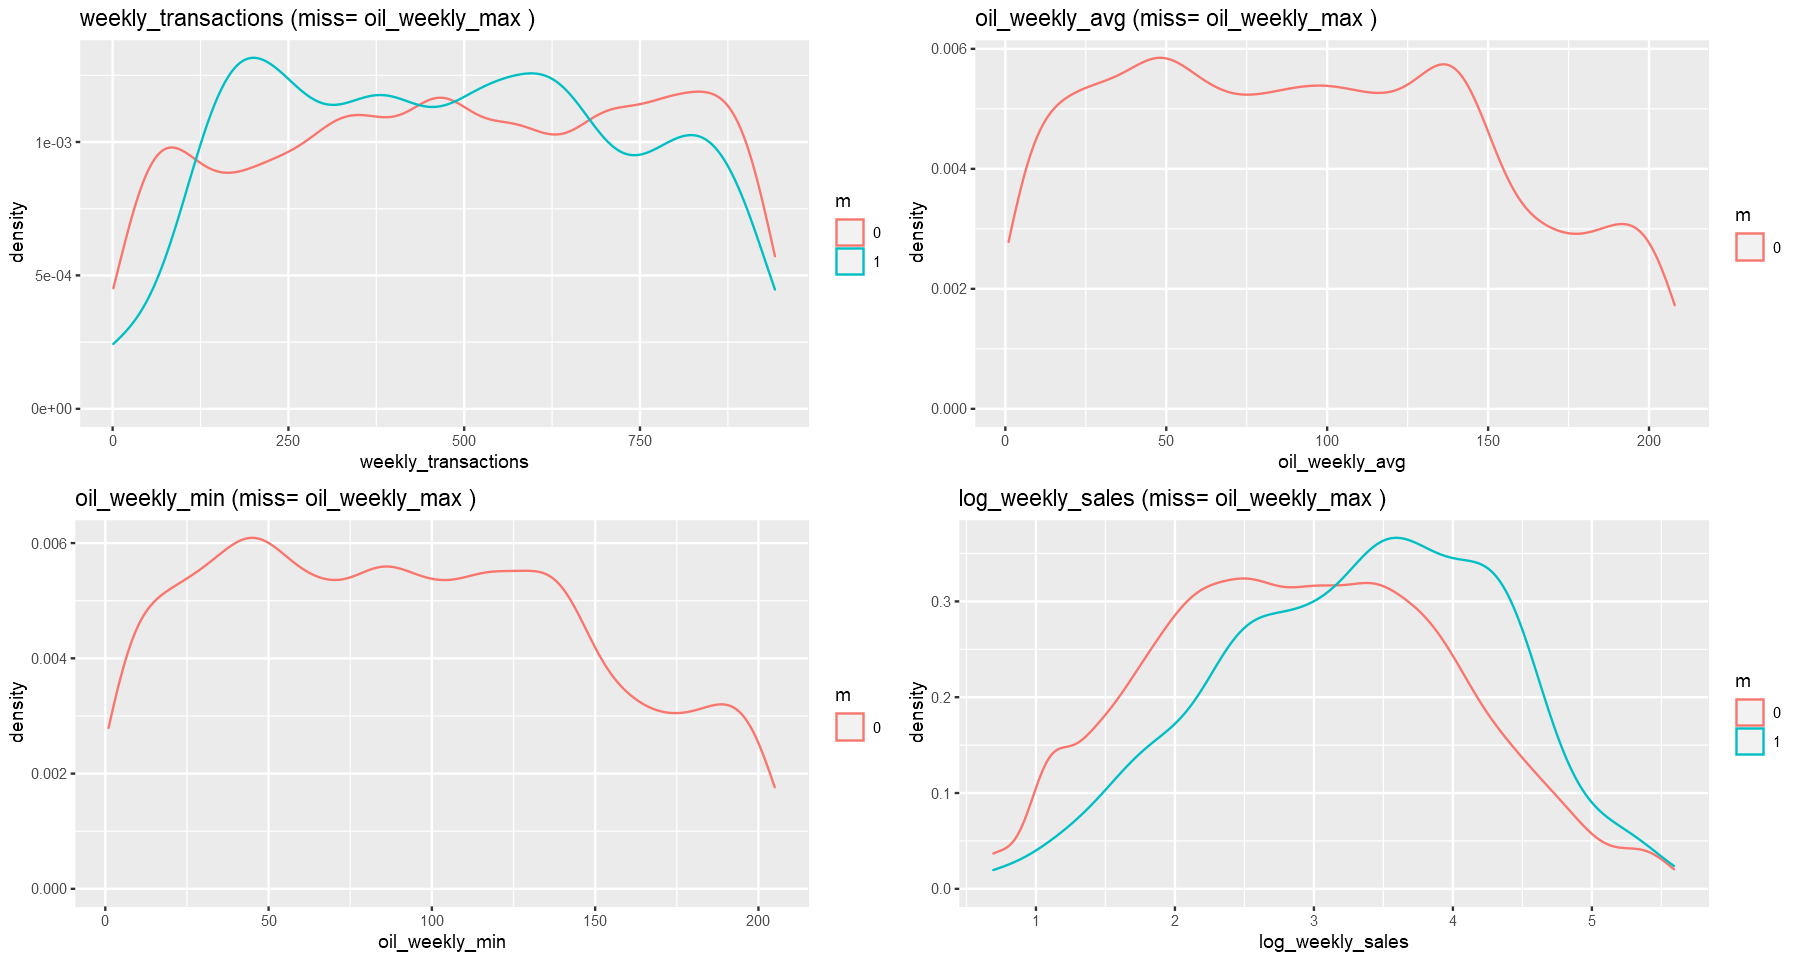

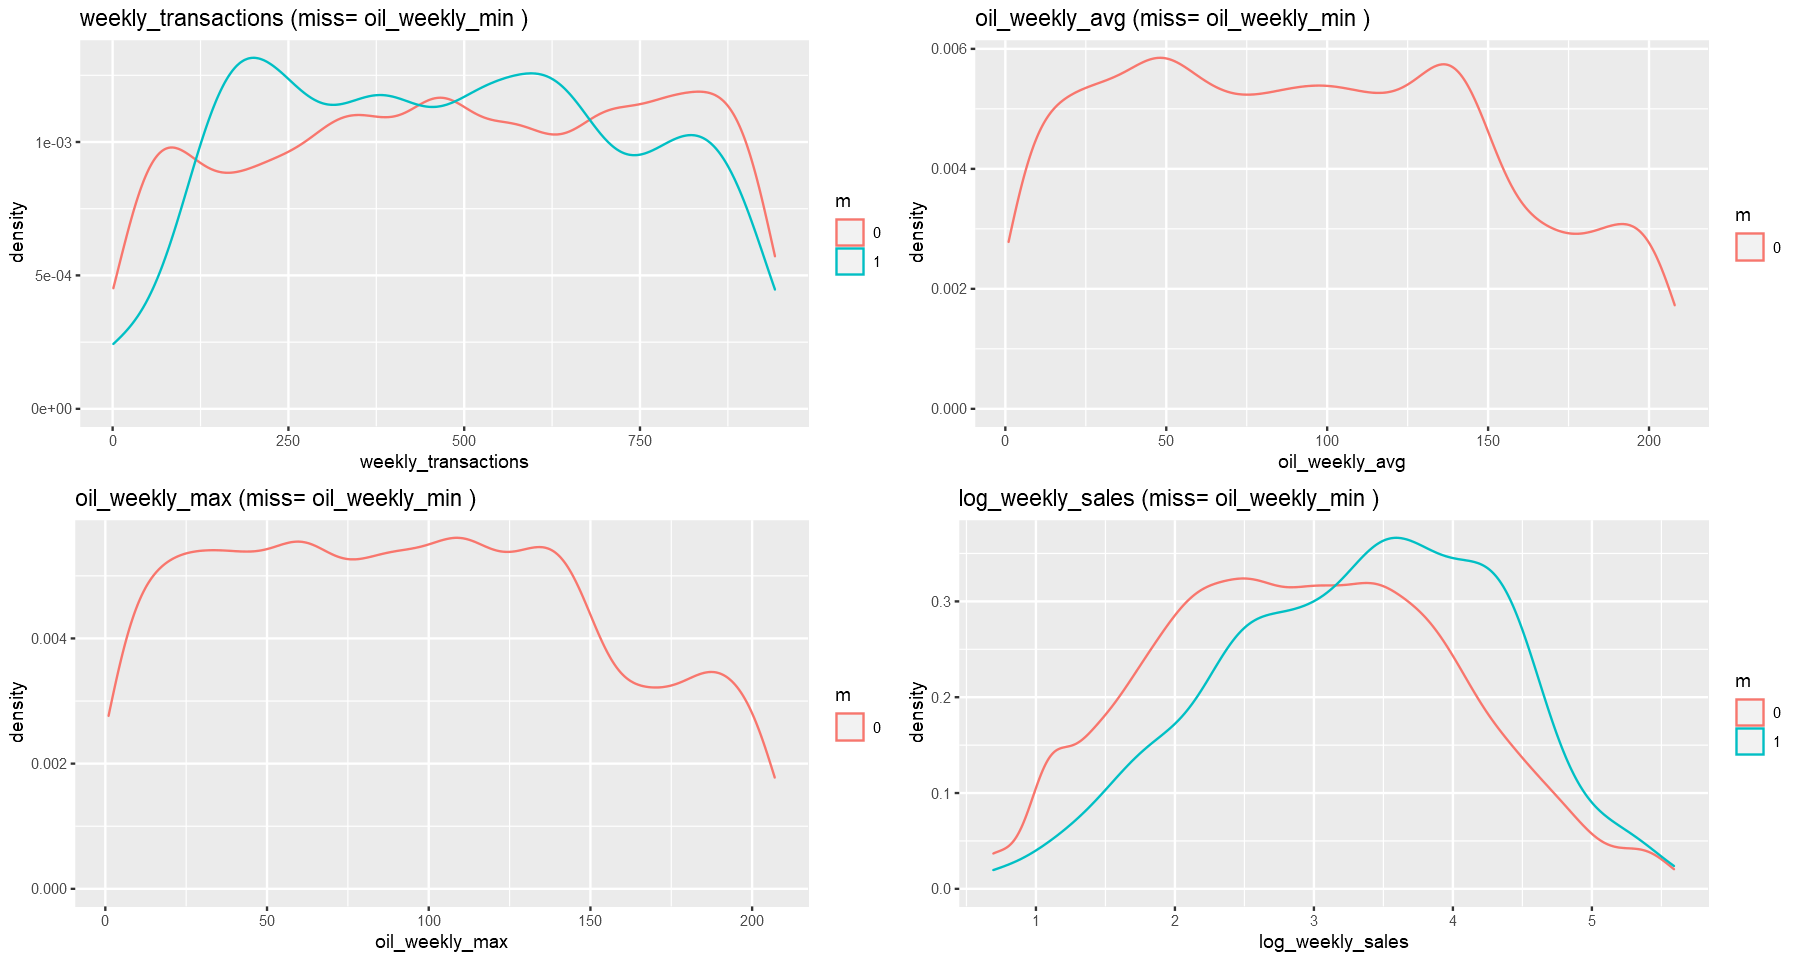

In [101]:
library(gridExtra)
library(ggplot2)

for (m in mmrevised$missingness$var) {
    p <- list()
    i <- 1
    for (v in numlst1) {
        if (v != m) {
            ff <- data.frame(v=df1[[v]],m=factor(df_na[[m]]))
            p[[i]] <- suppressMessages(ggplot(data=ff,aes(x=v,group=m,color=m)) +
              geom_density()+labs(title=paste(v, "(miss=", m,")"),x =v))
            i <- i + 1
        }
    }
    do.call(grid.arrange,p)
}


In [102]:
####    Making desicions about the mechanism of missingness using the Kolmogorov-Smirnov test

In [103]:

mmrevised$missingness$var
numlst1

[1] "onpromotion"    "oil_weekly_avg" "oil_weekly_max" "oil_weekly_min"

[1] "weekly_transactions" "oil_weekly_avg"      "oil_weekly_max"     
[4] "oil_weekly_min"      "log_weekly_sales"

In [104]:
length(df_na$averageoil)

[1] 0

In [105]:
mmrevised <- getMissingness(data = df1)
mmrevised$missingness$var

[[1]]
             var na.count rate
1    onpromotion     1574 15.8
2 oil_weekly_avg      901  9.1
3 oil_weekly_max      901  9.1
4 oil_weekly_min      901  9.1

[[2]]
[1] "This dataset has 7888 (79.3%) complete rows. Original data has 9951 rows."



[1] "onpromotion"    "oil_weekly_avg" "oil_weekly_max" "oil_weekly_min"

In [106]:
### test the missing mechanism using glm
res <- NULL
for (m in mmrevised$missingness$var) {
    ## change the current tested variable with the missing indicator for this variable
    ff <- df1[,nm1]
    ff[[m]] <- df_na[[m]]
    mod <- glm(ff[[m]] ~.,data=ff,family="binomial")
    sm <- summary(mod)
    if(is.null(sm)==F) {
      sm2 <- data.frame(var=row.names(sm$coefficients),pvalue=sm$coefficients[,4])
      res <- rbind(res, cbind(m,sm2))
      #append(res, sm, m)
    } else {
      print(sm)
    }
}
row.names(res) <- NULL
res

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"


m,var,pvalue
<chr>,<chr>,<dbl>
onpromotion,(Intercept),0.9998343
onpromotion,YYYYWW201302,1.0000000
onpromotion,YYYYWW201303,1.0000000
onpromotion,YYYYWW201304,1.0000000
onpromotion,YYYYWW201305,1.0000000
onpromotion,YYYYWW201306,1.0000000
onpromotion,YYYYWW201307,1.0000000
onpromotion,YYYYWW201308,1.0000000
onpromotion,YYYYWW201309,1.0000000


In [107]:
row.names(res) <- NULL

In [108]:
res %>% filter(pvalue<0.05)

m,var,pvalue
<chr>,<chr>,<dbl>


In [109]:
#None of the explanatory variables have significantly predicted the missingness on any variable.
#So no variable can explain the presence of missing values on any of the missing variables
#Thus we can assume that the missing mechanism is at least MCAR
#For the imputation of "Onpromotion" variable I will add a 3rd level catagory "2" (0=False, 1=True, 2=NuLL)

# Imputation
## Recategories Onpromotion (0=False, 1=True, 2=NA)

In [110]:
df1$onpromotion_temp <-2
df1$onpromotion_temp[df1$onpromotion=='True'] <-1
df1$onpromotion_temp[df1$onpromotion=='False'] <-0

df1$onpromotion_temp <-as.factor(df1$onpromotion_temp)
summary(df1$onpromotion_temp)


0    1    2 
4531 3846 1574

In [111]:
df1$onpromotion<-df1$onpromotion_temp

In [112]:
df1 <- df1[-c(length(names(df1)))]

In [113]:
names(df1)
length(names(df1))

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "weekly_transactions"                
 [7] "onpromotion"                         "city"                               
 [9] "state"                               "National_Ecuador_weekly_holidays"   
[11] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[13] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[15] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[17] "oil_weekly_avg"                      "oil_weekly_max"                     
[19] "oil_weekly_min"                      "EQ_Impact"                          
[21] "log_weekly_sales"

[1] 21

In [114]:
mmrevised <- getMissingness(data = df1)
mmrevised$missingness$var

[[1]]
             var na.count rate
1 oil_weekly_avg      901  9.1
2 oil_weekly_max      901  9.1
3 oil_weekly_min      901  9.1

[[2]]
[1] "This dataset has 9050 (90.9%) complete rows. Original data has 9951 rows."



[1] "oil_weekly_avg" "oil_weekly_max" "oil_weekly_min"

## Since there are 9% missings values in each of the oil_weekly features, and the feature is important, we canot drop either rows nor the features. A model based imputation is needed

# IMPORTANT COMMENT !!!!

### although it would be better to complete the missing data of oil using KNN model, I will use crude oil avgerage price from the previus weeks (preformed at EXCEL)

In [115]:
write.csv(df1,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/df1_impute.csv", row.names = FALSE)

In [152]:
df2 <-read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/df1_impute.csv")

In [153]:
mechkar::getMissingness(df2)

list(var = character(0), na_count = numeric(0), rate = numeric(0))This dataset has 9951 (100%) complete rows. Original data has 9951 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>


Feature Engineering  / Impact Coding / Data Extraction / Data Transformation

One-hot encoding and Dummy encoding

In [154]:
df5<-df2

In [155]:
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,oil_weekly_avg,oil_weekly_max,oil_weekly_min,EQ_Impact,log_weekly_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,0,0,0,0,0,159,154,166,0,1.098612
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,0,0,0,0,0,159,154,166,0,4.812184
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,0,0,0,0,0,159,154,166,0,4.779123
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,0,0,0,0,0,159,154,166,0,1.945910
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,0,0,0,0,0,159,154,166,0,3.555348
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,0,0,0,0,0,159,154,166,0,2.079442


In [156]:
names(df5)

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "weekly_transactions"                
 [7] "onpromotion"                         "city"                               
 [9] "state"                               "National_Ecuador_weekly_holidays"   
[11] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[13] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[15] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[17] "oil_weekly_avg"                      "oil_weekly_max"                     
[19] "oil_weekly_min"                      "EQ_Impact"                          
[21] "log_weekly_sales"

In [157]:
var<-c('item_nbr', 'onpromotion', 'store_nbr', 'item_nbr', 'item_class','city', 'state','YYYYWW', 'WW')
var

[1] "item_nbr"    "onpromotion" "store_nbr"   "item_nbr"    "item_class" 
[6] "city"        "state"       "YYYYWW"      "WW"

In [158]:
one_hot_encode <- function(df,var) {
    df[[var]] <- factor(df[[var]])
    for (l in levels(df[[var]])) {
        df[[paste(var,l,sep="_")]] <- ifelse(df[[var]]==l,1,0)
    }
    return(df)
}

In [159]:
df5 <- one_hot_encode(df5,"item_nbr")
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,oil_weekly_min,EQ_Impact,log_weekly_sales,item_nbr_252698,item_nbr_589403,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036
,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<int>,...,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,166,0,1.098612,1,0,0,0,0,0,0
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,166,0,4.812184,0,0,0,0,1,0,0
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,166,0,4.779123,0,0,0,1,0,0,0
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,166,0,1.945910,0,1,0,0,0,0,0
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,166,0,3.555348,0,0,1,0,0,0,0
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,166,0,2.079442,0,1,0,0,0,0,0


In [160]:
df5 <- one_hot_encode(df5,"onpromotion")
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,item_nbr_252698,item_nbr_589403,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,onpromotion_2
,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<chr>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,1,0,0,0,0,0,0,0,0,1
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,0,0,0,0,1,0,0,0,0,1
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,0,0,0,1,0,0,0,0,0,1
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,0,1,0,0,0,0,0,0,0,1
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,0,0,1,0,0,0,0,0,0,1
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,0,1,0,0,0,0,0,0,0,1


In [161]:
df5 <- one_hot_encode(df5,"store_nbr")
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,onpromotion_2,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_50
,<int>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<chr>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,0,0,0,0,0,1,0,0,0,1
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,1,0,0,0,0,1,1,0,0,0
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,0,0,0,0,0,1,0,1,0,0
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,0,0,0,0,0,1,1,0,0,0
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,0,0,0,0,0,1,0,0,1,0
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,0,0,0,0,0,1,0,0,1,0


In [162]:
df5 <- one_hot_encode(df5,"WW")
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,WW_44,WW_45,WW_46,WW_47,WW_48,WW_49,WW_50,WW_51,WW_52,WW_53
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<chr>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,0,0,0,0,0,0,0,0,0,0
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,0,0,0
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,0,0,0
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,0,0,0
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,0,0,0
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df5 <- one_hot_encode(df5,"item_class")
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,WW_49,WW_50,WW_51,WW_52,WW_53,item_class_2802,item_class_2806,item_class_2850,item_class_2854,item_class_2864
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<chr>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,0,0,0,0,0,0,1,0,0,0
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,0,1,0
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,0,0,0,0,0,1,0,0,0,0
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,1,0,0
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,0,0,0,0,0,1,0,0,0,0
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,0,0,0,0,0,0,0,1,0,0


In [164]:
df5 <- one_hot_encode(df5,"city")
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,WW_51,WW_52,WW_53,item_class_2802,item_class_2806,item_class_2850,item_class_2854,item_class_2864,city_Ambato,city_Quito
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,0,0,0,0,1,0,0,0,1,0
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,0,0,0,0,0,0,1,0,0,1
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,0,0,0,1,0,0,0,0,0,1
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,0,0,0,0,0,1,0,0,0,1
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,0,0,0,1,0,0,0,0,0,1
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,0,0,0,0,0,1,0,0,0,1


In [165]:
df5 <- one_hot_encode(df5,"state")
head(df5)

,YYYYWW,WW,store_nbr,item_nbr,item_class,weekly_transactions,onpromotion,city,state,National_Ecuador_weekly_holidays,...,WW_53,item_class_2802,item_class_2806,item_class_2850,item_class_2854,item_class_2864,city_Ambato,city_Quito,state_Pichincha,state_Tungurahua
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201301,1,50,252698,2806,16,2,Ambato,Tungurahua,1,...,0,0,1,0,0,0,1,0,0,1
2,201301,1,46,741201,2854,60,2,Quito,Pichincha,1,...,0,0,0,0,1,0,0,1,1,0
3,201301,1,47,699745,2802,50,2,Quito,Pichincha,1,...,0,1,0,0,0,0,0,1,1,0
4,201301,1,46,589403,2850,60,2,Quito,Pichincha,1,...,0,0,0,1,0,0,0,1,1,0
5,201301,1,48,695758,2802,18,2,Quito,Pichincha,1,...,0,1,0,0,0,0,0,1,1,0
6,201301,1,48,589403,2850,18,2,Quito,Pichincha,1,...,0,0,0,1,0,0,0,1,1,0


In [166]:
names(df5)

[1] "YYYYWW"                              "WW"                                 
 [3] "store_nbr"                           "item_nbr"                           
 [5] "item_class"                          "weekly_transactions"                
 [7] "onpromotion"                         "city"                               
 [9] "state"                               "National_Ecuador_weekly_holidays"   
[11] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
[13] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
[15] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
[17] "oil_weekly_avg"                      "oil_weekly_max"                     
[19] "oil_weekly_min"                      "EQ_Impact"                          
[21] "log_weekly_sales"                    "item_nbr_252698"                    
[23] "item_nbr_589403"                     "item_nbr_695758"                    
[25] "item_nbr_699745"                     "item_nbr_741201"                    
[27] "item_nbr_1110679"                    "item_nbr_1247036"                   
[29] "onpromotion_0"                       "onpromotion_1"                      
[31] "onpromotion_2"                       "store_nbr_46"                       
[33] "store_nbr_47"                        "store_nbr_48"                       
[35] "store_nbr_50"                        "WW_1"                               
[37] "WW_2"                                "WW_3"                               
[39] "WW_4"                                "WW_5"                               
[41] "WW_6"                                "WW_7"                               
[43] "WW_8"                                "WW_9"                               
[45] "WW_10"                               "WW_11"                              
[47] "WW_12"                               "WW_13"                              
[49] "WW_14"                               "WW_15"                              
[51] "WW_16"                               "WW_17"                              
[53] "WW_18"                               "WW_19"                              
[55] "WW_20"                               "WW_21"                              
[57] "WW_22"                               "WW_23"                              
[59] "WW_24"                               "WW_25"                              
[61] "WW_26"                               "WW_27"                              
[63] "WW_28"                               "WW_29"                              
[65] "WW_30"                               "WW_31"                              
[67] "WW_32"                               "WW_33"                              
[69] "WW_34"                               "WW_35"                              
[71] "WW_36"                               "WW_37"                              
[73] "WW_38"                               "WW_39"                              
[75] "WW_40"                               "WW_41"                              
[77] "WW_42"                               "WW_43"                              
[79] "WW_44"                               "WW_45"                              
[81] "WW_46"                               "WW_47"                              
[83] "WW_48"                               "WW_49"                              
[85] "WW_50"                               "WW_51"                              
[87] "WW_52"                               "WW_53"                              
[89] "item_class_2802"                     "item_class_2806"                    
[91] "item_class_2850"                     "item_class_2854"                    
[93] "item_class_2864"                     "city_Ambato"                        
[95] "city_Quito"                          "state_Pichincha"                    
[97] "state_Tungurahua"

In [167]:
df6<-df5
df6<-select(df6, -item_nbr)
df6<-select(df6, -onpromotion)
df6<-select(df6, -store_nbr)
df6<-select(df6, -item_class)
df6<-select(df6, -city)
df6<-select(df6, -state)
df6<-select(df6, -YYYYWW)
df6<-select(df6, -WW)

head(df6)
names(df6)

,weekly_transactions,National_Ecuador_weekly_holidays,National_Ecuador_weekly_additionals,National_Ecuador_weekly_events,National_Ecuador_weekly_bridges,locale_Ambato_weekly_holidays,locale_Quito_weekly_holidays,locale_Quito_weekly_additionals,oil_weekly_avg,oil_weekly_max,...,WW_53,item_class_2802,item_class_2806,item_class_2850,item_class_2854,item_class_2864,city_Ambato,city_Quito,state_Pichincha,state_Tungurahua
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16,1,0,0,0,0,0,0,159,154,...,0,0,1,0,0,0,1,0,0,1
2,60,1,0,0,0,0,0,0,159,154,...,0,0,0,0,1,0,0,1,1,0
3,50,1,0,0,0,0,0,0,159,154,...,0,1,0,0,0,0,0,1,1,0
4,60,1,0,0,0,0,0,0,159,154,...,0,0,0,1,0,0,0,1,1,0
5,18,1,0,0,0,0,0,0,159,154,...,0,1,0,0,0,0,0,1,1,0
6,18,1,0,0,0,0,0,0,159,154,...,0,0,0,1,0,0,0,1,1,0


[1] "weekly_transactions"                 "National_Ecuador_weekly_holidays"   
 [3] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
 [5] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
 [7] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
 [9] "oil_weekly_avg"                      "oil_weekly_max"                     
[11] "oil_weekly_min"                      "EQ_Impact"                          
[13] "log_weekly_sales"                    "item_nbr_252698"                    
[15] "item_nbr_589403"                     "item_nbr_695758"                    
[17] "item_nbr_699745"                     "item_nbr_741201"                    
[19] "item_nbr_1110679"                    "item_nbr_1247036"                   
[21] "onpromotion_0"                       "onpromotion_1"                      
[23] "onpromotion_2"                       "store_nbr_46"                       
[25] "store_nbr_47"                        "store_nbr_48"                       
[27] "store_nbr_50"                        "WW_1"                               
[29] "WW_2"                                "WW_3"                               
[31] "WW_4"                                "WW_5"                               
[33] "WW_6"                                "WW_7"                               
[35] "WW_8"                                "WW_9"                               
[37] "WW_10"                               "WW_11"                              
[39] "WW_12"                               "WW_13"                              
[41] "WW_14"                               "WW_15"                              
[43] "WW_16"                               "WW_17"                              
[45] "WW_18"                               "WW_19"                              
[47] "WW_20"                               "WW_21"                              
[49] "WW_22"                               "WW_23"                              
[51] "WW_24"                               "WW_25"                              
[53] "WW_26"                               "WW_27"                              
[55] "WW_28"                               "WW_29"                              
[57] "WW_30"                               "WW_31"                              
[59] "WW_32"                               "WW_33"                              
[61] "WW_34"                               "WW_35"                              
[63] "WW_36"                               "WW_37"                              
[65] "WW_38"                               "WW_39"                              
[67] "WW_40"                               "WW_41"                              
[69] "WW_42"                               "WW_43"                              
[71] "WW_44"                               "WW_45"                              
[73] "WW_46"                               "WW_47"                              
[75] "WW_48"                               "WW_49"                              
[77] "WW_50"                               "WW_51"                              
[79] "WW_52"                               "WW_53"                              
[81] "item_class_2802"                     "item_class_2806"                    
[83] "item_class_2850"                     "item_class_2854"                    
[85] "item_class_2864"                     "city_Ambato"                        
[87] "city_Quito"                          "state_Pichincha"                    
[89] "state_Tungurahua"

In [168]:
# For each origin categorical variable that we used one-hot-encoding we'll reduce dummies that have the less frequent 1

In [169]:
df2 %>% group_by(onpromotion) %>% tally

onpromotion,n
<int>,<int>
0,4531
1,3846
2,1574


In [170]:
df6<-select(df6, -onpromotion_2)

In [171]:
df2 %>% group_by(item_nbr) %>% tally


item_nbr,n
<int>,<int>
252698,1237
589403,1310
695758,1495
699745,1531
741201,1570
1110679,1524
1247036,1284


In [172]:
df6<-select(df6, -item_nbr_252698)

In [173]:
df2 %>% group_by(store_nbr) %>% tally

store_nbr,n
<int>,<int>
46,2582
47,2636
48,2557
50,2176


In [174]:
df6<-select(df6, -store_nbr_50)

In [175]:
df2 %>% group_by(item_class) %>% tally

item_class,n
<int>,<int>
2802,3026
2806,1237
2850,2834
2854,1570
2864,1284


In [176]:
df6<-select(df6, -item_class_2806)

In [177]:
df2 %>% group_by(city) %>% tally

city,n
<chr>,<int>
Ambato,2176
Quito,7775


In [178]:
df6<-select(df6, -city_Ambato)

In [179]:
df2 %>% group_by(state) %>% tally

state,n
<chr>,<int>
Pichincha,7775
Tungurahua,2176


In [180]:
df6<-select(df6, -state_Tungurahua)

In [181]:
df2 %>% group_by(WW) %>% tally

WW,n
<int>,<int>
1,160
2,190
3,195
4,195
5,198
6,195
7,195
8,202
9,199


In [182]:
df6<-select(df6, -WW_53)

In [183]:
# Verify that there're no missings
mechkar::getMissingness(df6)

list(var = character(0), na_count = numeric(0), rate = numeric(0))This dataset has 9951 (100%) complete rows. Original data has 9951 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>


In [184]:
dim(df6)

[1] 9951   82

In [185]:
names(df6)

[1] "weekly_transactions"                 "National_Ecuador_weekly_holidays"   
 [3] "National_Ecuador_weekly_additionals" "National_Ecuador_weekly_events"     
 [5] "National_Ecuador_weekly_bridges"     "locale_Ambato_weekly_holidays"      
 [7] "locale_Quito_weekly_holidays"        "locale_Quito_weekly_additionals"    
 [9] "oil_weekly_avg"                      "oil_weekly_max"                     
[11] "oil_weekly_min"                      "EQ_Impact"                          
[13] "log_weekly_sales"                    "item_nbr_589403"                    
[15] "item_nbr_695758"                     "item_nbr_699745"                    
[17] "item_nbr_741201"                     "item_nbr_1110679"                   
[19] "item_nbr_1247036"                    "onpromotion_0"                      
[21] "onpromotion_1"                       "store_nbr_46"                       
[23] "store_nbr_47"                        "store_nbr_48"                       
[25] "WW_1"                                "WW_2"                               
[27] "WW_3"                                "WW_4"                               
[29] "WW_5"                                "WW_6"                               
[31] "WW_7"                                "WW_8"                               
[33] "WW_9"                                "WW_10"                              
[35] "WW_11"                               "WW_12"                              
[37] "WW_13"                               "WW_14"                              
[39] "WW_15"                               "WW_16"                              
[41] "WW_17"                               "WW_18"                              
[43] "WW_19"                               "WW_20"                              
[45] "WW_21"                               "WW_22"                              
[47] "WW_23"                               "WW_24"                              
[49] "WW_25"                               "WW_26"                              
[51] "WW_27"                               "WW_28"                              
[53] "WW_29"                               "WW_30"                              
[55] "WW_31"                               "WW_32"                              
[57] "WW_33"                               "WW_34"                              
[59] "WW_35"                               "WW_36"                              
[61] "WW_37"                               "WW_38"                              
[63] "WW_39"                               "WW_40"                              
[65] "WW_41"                               "WW_42"                              
[67] "WW_43"                               "WW_44"                              
[69] "WW_45"                               "WW_46"                              
[71] "WW_47"                               "WW_48"                              
[73] "WW_49"                               "WW_50"                              
[75] "WW_51"                               "WW_52"                              
[77] "item_class_2802"                     "item_class_2850"                    
[79] "item_class_2854"                     "item_class_2864"                    
[81] "city_Quito"                          "state_Pichincha"

In [186]:
write.csv(df6,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/OHE.csv", row.names = FALSE)